## Web Scraping and Data Analysis of Agoda Hotel Listings
This notebook demonstrates a complete web scraping and data analysis project. We will scrape hotel data from Agoda for Berlin, pre-process it, perform exploratory data analysis with visualizations, and finally, create an interactive tool to filter and find accommodations based on user preferences.

## Step 0: Library Installation
Before running the code, you need to install all the required Python libraries. Run the following command in your terminal or a code cell in the notebook.

In [ ]:
!apt-get install -y xvfb

!pip install selenium selenium-stealth beautifulsoup4 requests pandas matplotlib seaborn pyvirtualdisplay

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.15.0
    Uninstalling typing_extensions-4.15.0:
      Successfully uninstalled typing_extensions-4.15.0


## Step 1: Importing Necessary Libraries
This cell imports all the tools we'll need for this project:

Selenium & Selenium-Stealth: For web browser automation and to make our scraper appear more like a human user, avoiding detection.

**BeautifulSoup**: To parse the HTML content of the web pages.

**requests**: For making HTTP requests (though Selenium handles most of this).

**csv, time, re**: Standard libraries for handling CSV files, pausing the script, and using regular expressions for text parsing.

**pandas**: For data manipulation and analysis.

**matplotlib & seaborn**: For creating data visualizations.

In [ ]:
from selenium import webdriver
from selenium_stealth import stealth
from pyvirtualdisplay import Display

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait

from selenium.webdriver.support import expected_conditions as EC

from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import requests
import csv
import time
from bs4 import BeautifulSoup
import re

## Step 2: Browser Configuration and Initialization
Here, we set up the options for our Selenium Chrome browser. These settings are crucial for making the automated browser session look like a normal user session, which helps prevent websites from blocking our scraper.

* We add arguments to maximize the window, disable pop-ups, and run in incognito mode.

* The `experimental_option` flags help disable features that identify the browser as automated (e.g., `enable-automation`).

* Finally, we initialize the `webdriver.Chrome` with these custom options.

In [ ]:
!apt-get install -y xvfb

!pip install pyvirtualdisplay


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.15).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
# Start a virtual display
display = Display(visible=0, size=(1920, 1080))
display.start()

# Set up Chrome options (ensure --headless is NOT used)
chrome_options = Options()
chrome_options.add_argument('start-maximized')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--disable-search-engine-choice-screen")
chrome_options.add_argument('disable-infobars')
chrome_options.add_argument('--disable-blink-features=AutomationControlled')
chrome_options.add_argument("--ignore-certificate-errors")
chrome_options.add_argument("--incognito")
chrome_options.add_argument('--enable-javascript')
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
chrome_options.add_experimental_option('useAutomationExtension', False)
chrome_options.add_argument("lang=en")
chrome_options.add_argument("--disable-extensions")

# Initialize the WebDriver
driver = webdriver.Chrome(options=chrome_options)

# ✅ You can now use the 'driver' object as usual.
# The browser is running with a GUI on the virtual display.

## Step 3: Navigating to the Target Website
We define the `base_url` for the Agoda search results page for hotels in Berlin. The `driver.get()` command instructs our automated browser to open this specific URL.

In [ ]:
base_url = "https://www.agoda.com/search?guid=f0574e3f-2226-46cf-8894-df24a19871fd&asq=bFdTL9llP7BZ4SejwwejB5ufa9Vwpz6XltTHq4n%2B9gP1PvdgVUVP68h57eVdQuv8zAuvidgVQbMVJtWjbT5XSiV8O1SzHJ7Bv9omVvB8VpUhNyELUnP473CoeI1YjeH7r6QDs48C6hOjLzuYUvlEgOm%2B3QacrQMDUE7JkJAfzu0qEfFok0%2FA1qOZi6L4zoeokKYGADqLl%2Fs%2FexkxVWVq8Q%3D%3D&city=2366&tick=638944055347&locale=en-us&ckuid=bf2efb66-d432-4fb0-8f76-90808d8da447&prid=0&gclid=Cj0KCQjwoP_FBhDFARIsANPG24MP6LSCJ6hgoyZqtwziJYVSRlr8FFn8filCqjazS5me2T1BR7Jb2hgaAnH3EALw_wcB&currency=EUR&correlationId=c4601932-8ec9-4dd8-93a0-5bcf18cb6114&analyticsSessionId=2911659202760728498&pageTypeId=103&realLanguageId=1&languageId=1&origin=FI&stateCode=19&cid=1922882&tag=24920e43-d2a8-435f-847d-ff696f084c2a&userId=bf2efb66-d432-4fb0-8f76-90808d8da447&whitelabelid=1&loginLvl=0&storefrontId=3&currencyId=1&currencyCode=EUR&htmlLanguage=en-us&cultureInfoName=en-us&machineName=am-pc-4g-acm-web-user-6c656588b6-j9zvn&trafficGroupId=5&trafficSubGroupId=122&aid=82361&useFullPageLogin=true&cttp=4&isRealUser=true&mode=production&browserFamily=Chrome&cdnDomain=agoda.net&checkIn=2025-12-31&checkOut=2026-01-03&rooms=1&adults=1&children=0&priceCur=EUR&los=3&textToSearch=Berlin&productType=-1&travellerType=0&familyMode=off&ds=EMdQt91XP9yF574y"
driver.get(base_url)
driver.implicitly_wait(5)

## Step 4: Handling Dynamic Content with Scrolling
Modern websites like Agoda often use "lazy loading" or "infinite scroll" to load content dynamically as the user scrolls down. This means not all hotel listings are present in the initial HTML.

The `scroll_by_increment()` function simulates a user scrolling to the bottom of the page in small steps. It pauses between scrolls to allow new content to load and stops once it detects that no new content is being added.

In [ ]:
# Define scroll parameters : Feel free to change those parameters
SCROLL_INCREMENT = 500  # Scroll by 500 pixels at a time
SCROLL_PAUSE_TIME = 2
MAX_RETRIES = 10

def scroll_by_increment():
  """Scrolls down the page in increments and scrapes content."""

  last_height = driver.execute_script("return document.body.scrollHeight")
  retries = 0

  while True:
    # Get the current scroll position
    current_scroll = driver.execute_script("return window.pageYOffset;")

    # Scroll down by the defined increment
    driver.execute_script(f"window.scrollBy(0, {SCROLL_INCREMENT});")
    time.sleep(SCROLL_PAUSE_TIME)

    # Get the new scroll position
    new_scroll = driver.execute_script("return window.pageYOffset;")

    # Check if the scroll position has changed
    if new_scroll == current_scroll:
      retries += 1
    else:
      retries = 0

    # If we have reached the end of the scrollable area
    if retries >= MAX_RETRIES:
      print("Finished incremental scrolling.")
      break

### Note on Pagination
The commented-out code below is a placeholder for handling traditional pagination (clicking "Next Page" buttons). Since this page uses infinite scroll, we use the scrolling function instead. However, this is a good example of an alternative approach if the site structure were different.

In [ ]:
# next page - pagination if we have less than 50 accomodations
# I will not use it for the moment since it was confirmed that the first page has 90 accomodations
# if len(listings_urls) < 50:
#  driver.find_element(By.ID, 'paginationNext').click()

## Step 5: Extracting Accommodation URLs
After scrolling to load all the content, this cell finds all the HTML elements that contain links to the individual hotel pages. We use the class name PropertyCard__Link as a selector.

It then iterates through these elements, extracts the href attribute (the actual URL), and stores all the links in a list called accomodations for the next step.

In [ ]:
scroll_by_increment()

listings_urls = driver.find_elements(By.CLASS_NAME, 'PropertyCard__Link')
print(f"🏠{len(listings_urls)} accomodations have been scraped!")


accomodations = []

for listing_url in listings_urls:
  accomodations.append(listing_url.get_attribute('href'))

Finished incremental scrolling.
🏠98 accomodations have been scraped!


## Step 6: Scraping Detailed Information for Each Accommodation
This is the core of the scraping process. We loop through each hotel URL collected in the previous step.

1. **Navigate**: The browser opens the hotel's page.

2. **Extract Data**: We use specific selectors (CSS and XPath) to find and extract the text or attributes for each feature: name, address, rating, price, etc.

3. **Handle Missing Data**: The process is wrapped in a `try...except NoSuchElementException` block. This makes the scraper robust; if a piece of information (like the hotel's star rating) is missing on one page, it will print an error message but continue scraping the other hotels instead of crashing.

4. **Parse Text**: For the 'distance from center', we use a regular expression (`re.search`) to extract the numerical value from the text (e.g., from "1.5 km from center").

5. **Store Data**: The extracted information for each hotel is stored in a dictionary, which is then added to the `accomodations_data` list.

In [ ]:
# Extracting the features needed
accomodations_data = []

for accomodation in accomodations:
  driver.get(accomodation)
  driver.implicitly_wait(2)
  name = driver.find_element(By.CSS_SELECTOR, '[data-selenium=\"hotel-header-name\"]').text
  try:
    address = driver.find_element(By.CSS_SELECTOR, '[data-selenium=\"hotel-address-map\"]').text
    stars = driver.find_element(By.CSS_SELECTOR, '[data-element-name=\"mosaic-hotel-rating-container\"]').get_attribute('aria-label')
    rating = driver.find_element(By.XPATH, '//*[@id=\"property-critical-root\"]/div/div[4]/div[2]/div[2]/div[1]/div/div[1]/div/div[1]/button/div/div/div/div/div/div/h2/span[1]').text
    number_of_ratings = driver.find_element(By.XPATH, '//*[@id=\"property-critical-root\"]/div/div[4]/div[2]/div[2]/div[1]/div/div[1]/div/div[1]/button/div/div/div/div/p/div/span[1]/p').text
    price_per_night = driver.find_element(By.XPATH, '//*[@id=\"hotelNavBar\"]/nav/div/div/div[2]/div/span/div/span[5]').text
    images = [ img.get_attribute('src') for img in driver.find_element(By.XPATH, '//*[@id=\"property-critical-root\"]/div/div[4]/div[1]/div[1]/div[1]').find_elements(By.TAG_NAME, 'img') ]
    desc = driver.find_element(By.CSS_SELECTOR, '[data-element-name=\"property-short-description\"]').text

    distance_from_center_meters = 0
    try:
      # 1. Getting the raw text
      distance_text = driver.find_element(By.XPATH, '//*[@id=\"property-critical-root\"]/div/div[4]/div[2]/div[2]/div[3]/div[3]/div[1]/span/span[2]').text

      # 2. Using regex to find a number (integer or decimal) in the text
      match = re.search(r'(\d+\.?\d*)', distance_text)
      if match:
        distance_value = float(match.group(1))
        # Checking if the unit is 'km' and convert to meters for consistency
        if 'km' in distance_text.lower():
          distance_from_center_meters = distance_value * 1000
        else: # Assume meters otherwise
          distance_from_center_meters = distance_value
    except NoSuchElementException:
      # If the element doesn't exist, we keep the default value of 0 or set to None
      print(f"Could not find distance element for {name}. Defaulting to 0.")
      distance_from_center_meters = 0

    accomodation_data = {
      "name": name,
      "address": address,
      "stars": stars,
      "rating": rating,
      "number of ratings": number_of_ratings,
      "price per night ($)": price_per_night,
      "description": desc,
      "images": images,
      "distance from center (m)": distance_from_center_meters
    }
    accomodations_data.append(accomodation_data)
  except NoSuchElementException as e:
    print(f'We encountered an error for {name}: {e}')

Could not find distance element for Garner Berlin - Spandau By IHG. Defaulting to 0.
Could not find distance element for ipartment Berlin Airport. Defaulting to 0.
We encountered an error for Estrel Hotel: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotelNavBar"]/nav/div/div/div[2]/div/span/div/span[5]"}
  (Session info: chrome=140.0.7339.207); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#nosuchelementexception
Stacktrace:
#0 0x58e0e7a35fba <unknown>
#1 0x58e0e74ba6d0 <unknown>
#2 0x58e0e750c2aa <unknown>
#3 0x58e0e750c541 <unknown>
#4 0x58e0e755a6c4 <unknown>
#5 0x58e0e7531e5d <unknown>
#6 0x58e0e7557b54 <unknown>
#7 0x58e0e7531c03 <unknown>
#8 0x58e0e74fe7a8 <unknown>
#9 0x58e0e74ff421 <unknown>
#10 0x58e0e79fab28 <unknown>
#11 0x58e0e79fe87f <unknown>
#12 0x58e0e79e2c49 <unknown>
#13 0x58e0e79ff405 <unknown>
#14 0x58e0e79c84ff <unknown>
#15 0x58e0e7a23258 <unknown

## Step 7: Finalizing the Scraping Process
Once the scraping loop is complete, we close the browser with `driver.close()` to free up system resources. Then, we print a summary of the results and display the first scraped item to verify the structure of our raw data.

In [ ]:
driver.close()
print(f'🏠 {len(accomodations_data)} out of {len(accomodations)} accommodations made it to the pre-processing phase!')
print(f'\nHere is an example of what we have now as data:\n {accomodations_data[0]}')

🏠 90 out of 98 accommodations made it to the pre-processing phase!

Here is an example of what we have now as data:
 {'name': 'Premier Inn Berlin City Centre', 'address': 'Kurfuerstenstrasse 78, Tiergarten, Berlin, Germany, 10787', 'stars': '3 stars out of 5', 'rating': '8.8', 'number of ratings': '24 reviews', 'price per night ($)': '101', 'description': "Get your trip off to a great start with a stay at this property, which offers free Wi-Fi in all rooms. Strategically situated in Tiergarten, allowing you access and proximity to local attractions and sights. Don't leave before paying a visit to the famous Brandenburg Gate (Brandenburger Tor). This 3-star property features restaurant to make your stay more indulgent and memorable.", 'images': ['https://pix8.agoda.net/hotelImages/28752942/0/22c8c85c26957c53a2632b0eaafc28e4.jpeg?ce=2&s=1024x768', 'https://q-xx.bstatic.com/xdata/images/hotel/max1024x768/724858777.jpg?k=da39aba97b3e77d74b480423c44db6f5a51973cf9fb44841153c061e970814e9&o=',

## Step 8: Data Cleaning and Pre-processing
Raw scraped data is often messy and not in the correct format for analysis. In this step, we use the pandas library to clean it up:

1. Create DataFrame: We convert our list of dictionaries into a pandas DataFrame.

2. Clean and Convert: We process each column to ensure it has the correct data type. For example:
<ul>

`stars`: Extracted from a string like "5 stars out of 5" to a float `5.0`.

`number`: of ratings: Cleaned from "3,099 reviews" to an integer `3099`.

`price per night ($)`: Converted from a string to a float.

</ul>

3. Feature Engineering: We create a new column, `total price ($)`, by multiplying the nightly price by 3 (based on the booking dates).

4. Inspect Data: We use `df.info()` and `df.head()` to check the final data types and view the first few rows of our clean dataset.

In [ ]:
# Pre-Processing the data
import pandas as pd

col_order = [
  "name",
  "address",
  "stars",
  "rating",
  "number of ratings",
  "total price ($)",
  "price per night ($)",
  "distance from center (m)",
  "description",
  "images"
]

df = pd.DataFrame(accomodations_data)

if not df.empty:
  df['stars'] = [ float(x[0]) for x in df['stars'].str.split()]
  df['rating'] = df['rating'].astype('float')
  df['number of ratings'] = [ int(x[0].replace(',', '')) for x in df['number of ratings'].str.split() ]
  df['price per night ($)'] = [ float(x.replace(',', '')) for x in df['price per night ($)']]
  df['distance from center (m)'] = df['distance from center (m)'].astype('float')
  df['total price ($)'] = df['price per night ($)'] * 3 # since we agreed as a team on 3 days from 31/12/2025 to 03/01/2026
df = df[col_order]
print("\nFind the following information about our data after pre-processing: ")
print(df.dtypes)
print("\n\n")
print(df.info())
print("\n\n")
df.head(10)


Find the following information about our data after pre-processing: 
name                         object
address                      object
stars                       float64
rating                      float64
number of ratings             int64
total price ($)             float64
price per night ($)         float64
distance from center (m)    float64
description                  object
images                       object
dtype: object



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      90 non-null     object 
 1   address                   90 non-null     object 
 2   stars                     90 non-null     float64
 3   rating                    90 non-null     float64
 4   number of ratings         90 non-null     int64  
 5   total price ($)           90 non-null     float64
 6   price

,name,address,stars,rating,number of ratings,total price ($),price per night ($),distance from center (m),description,images
0,Premier Inn Berlin City Centre,"Kurfuerstenstrasse 78, Tiergarten, Berlin, Ger...",3.0,8.8,24,303.0,101.0,0.0,Get your trip off to a great start with a stay...,[https://pix8.agoda.net/hotelImages/28752942/0...
1,Melia Berlin,"Friedrichstrasse 103, Mitte, Berlin, Germany, ...",4.5,8.8,416,483.0,161.0,0.0,Get your trip off to a great start with a stay...,[https://pix8.agoda.net/hotelImages/73872/-1/b...
2,Garner Hotel Berlin - Gendarmenmarkt By IHG,"Charlottenstrasse 66, Mitte, Berlin, Germany, ...",3.0,8.4,1305,243.0,81.0,0.0,Experience the vibrant heart of Berlin at Garn...,[https://pix8.agoda.net/hotelImages/115515/-1/...
3,Park Inn by Radisson Berlin Alexanderplatz,"Alexanderplatz 7, Mitte, Berlin, Germany, 10178",4.5,8.1,3099,321.0,107.0,0.0,"Located in Berlin's vibrant Mitte, Park Inn by...",[https://pix8.agoda.net/hotelImages/9455355/0/...
4,Garner Berlin - Spandau By IHG,"Freiheitstrasse 5, Spandau, Berlin, Germany, 1...",3.5,8.2,654,258.0,86.0,0.0,Get your trip off to a great start with a stay...,[https://pix8.agoda.net/hotelImages/277658/-1/...
5,Holiday Inn Express Berlin City Centre By IHG,"Stresemannstr. 49, Kreuzberg, Berlin, Germany,...",3.5,8.5,11431,309.0,103.0,350.0,"Located in Berlin's lively Kreuzberg district,...",[https://pix8.agoda.net/hotelImages/115421/0/2...
6,DoubleTree By Hilton Berlin Ku'Damm,"Los-Angeles-Platz 1, Charlottenburg, Berlin, G...",5.0,8.9,3584,408.0,136.0,0.0,Get your trip off to a great start with a stay...,[https://pix8.agoda.net/hotelImages/42102443/0...
7,Hotel Aldea Berlin Zentrum,"Buelowstr. 19-22, Schöneberg, Berlin, Germany,...",3.0,7.6,1249,225.0,75.0,840.0,Indulge in the vibrant and diverse neighborhoo...,[https://pix8.agoda.net/hotelImages/16447908/0...
8,SO/ Berlin Das Stue,"Drakestrasse 1, Tiergarten, Berlin, Germany, 1...",5.0,9.5,7,1029.0,343.0,0.0,Get your trip off to a great start with a stay...,[https://pix8.agoda.net/hotelImages/21601785/4...
9,Garner Berlin Schoneberg By IHG,"Potsdamer Str. 129, Schöneberg, Berlin, German...",3.5,7.6,3698,249.0,83.0,860.0,"Located in Schöneberg, Berlin, Garner Berlin S...",[https://pix8.agoda.net/hotelImages/115412/-1/...


## Step 9: Saving the Preprocessed Data
After cleaning, we save the DataFrame to a CSV file named `output_agora_berlin.csv`. This allows us to easily use the data for future analysis without needing to run the scraper again.

In [ ]:
# Saving The preprocessed data
df.to_csv('output_agora_berlin.csv')

## Step 10: Exploratory Data Analysis (EDA) and Visualization
In this section, we explore the cleaned dataset to uncover patterns, relationships, and insights. We use `matplotlib` and `seaborn` to create various plots.

1. **Distribution of Stars**: A count plot shows how many hotels fall into each star category (e.g., 3-star, 4-star).

2. **Distribution of Ratings**: A histogram shows the frequency of different review scores, giving us an idea of the overall quality of listings.

3. **Price Distributions**: Histograms for 'total price' and 'price per night' show the spread of prices.

4. **Relationships**:
<ul>

* A **boxplot** of price vs. stars helps us see if higher-starred hotels are generally more expensive.

* A **violin plot** of rating vs. stars shows the distribution of ratings within each star category.

* A **regression plot** visualizes the correlation between rating and nightly price.

* Another **boxplot** shows the distribution of the number of ratings across star categories.
</ul>

/tmp/ipython-input-3725487654.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette='viridis')


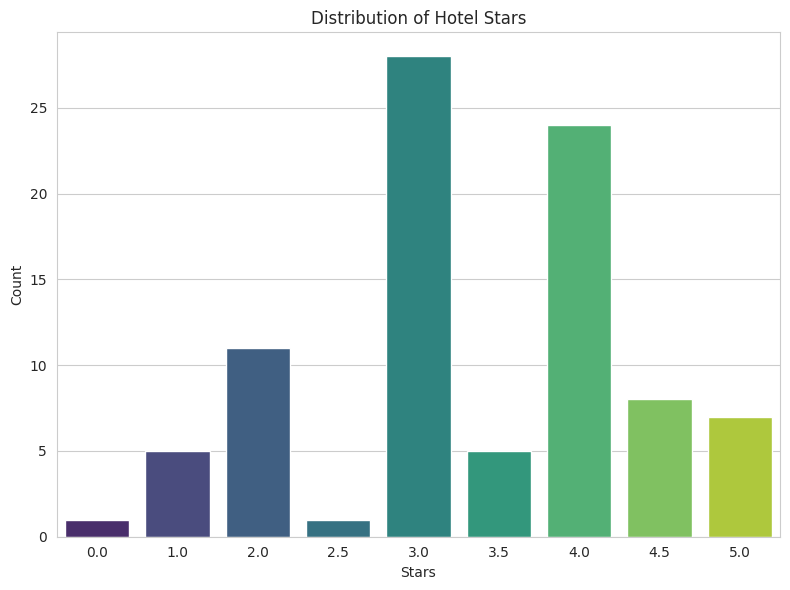

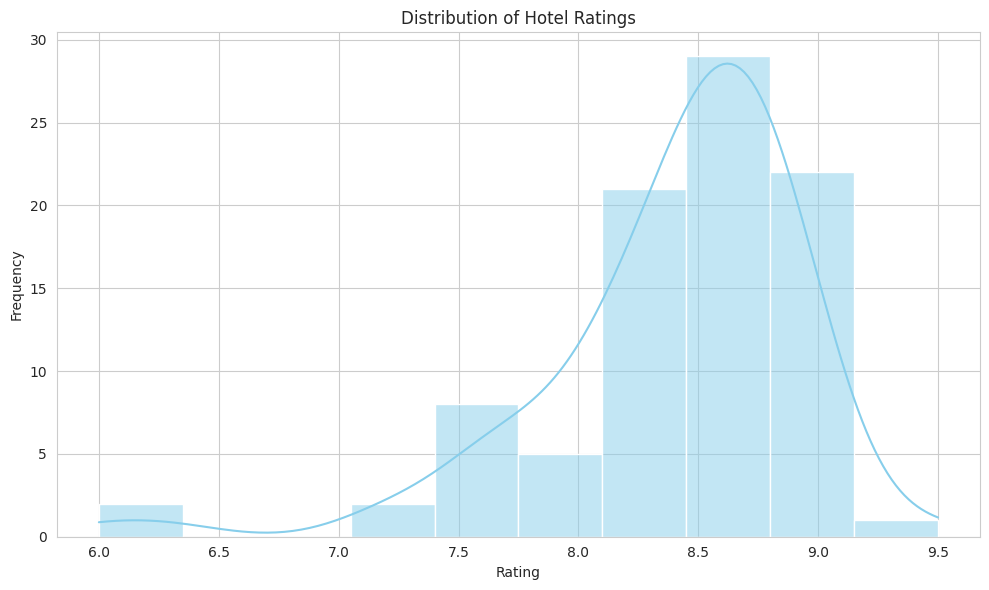

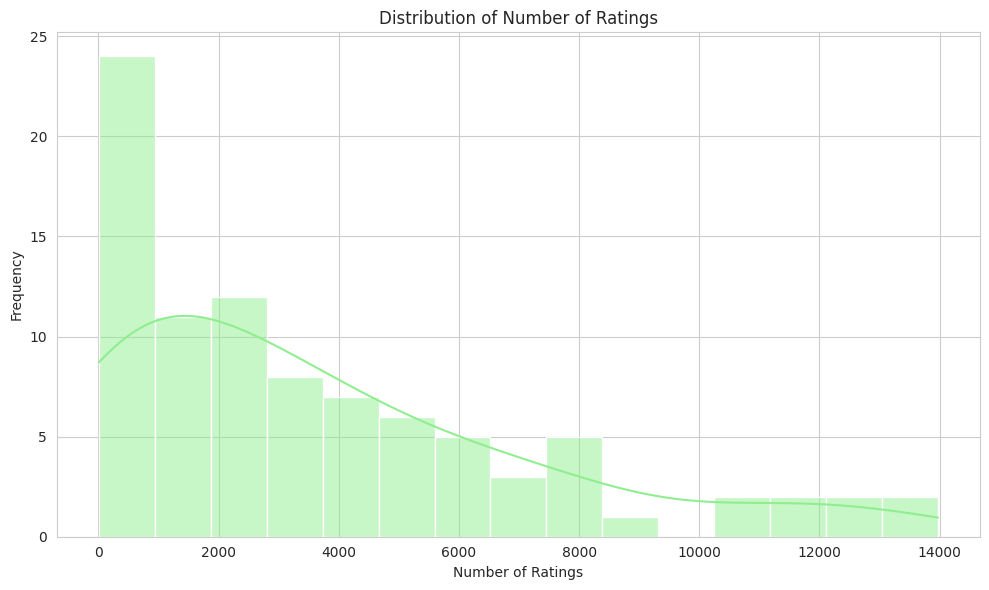

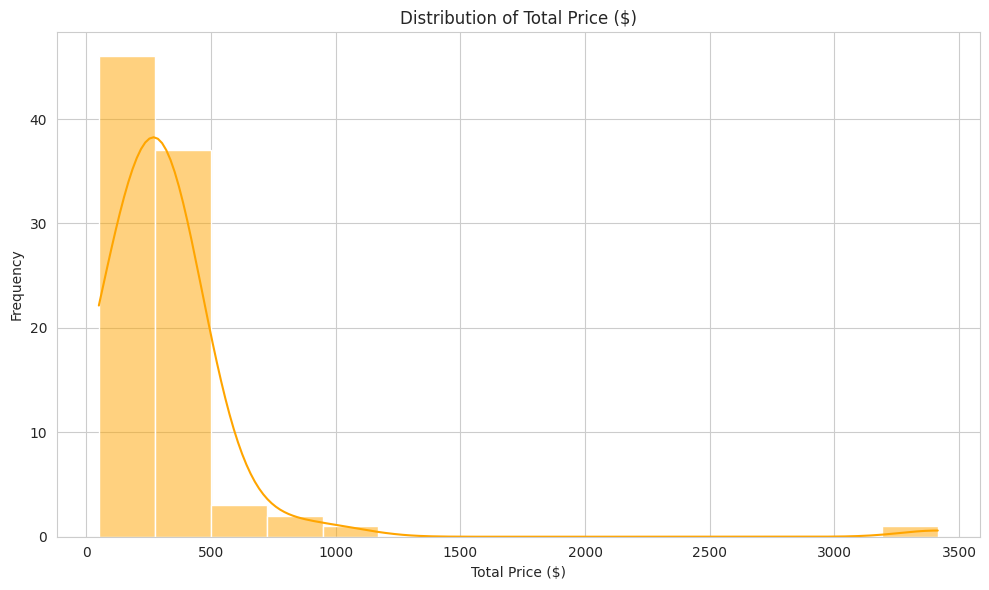

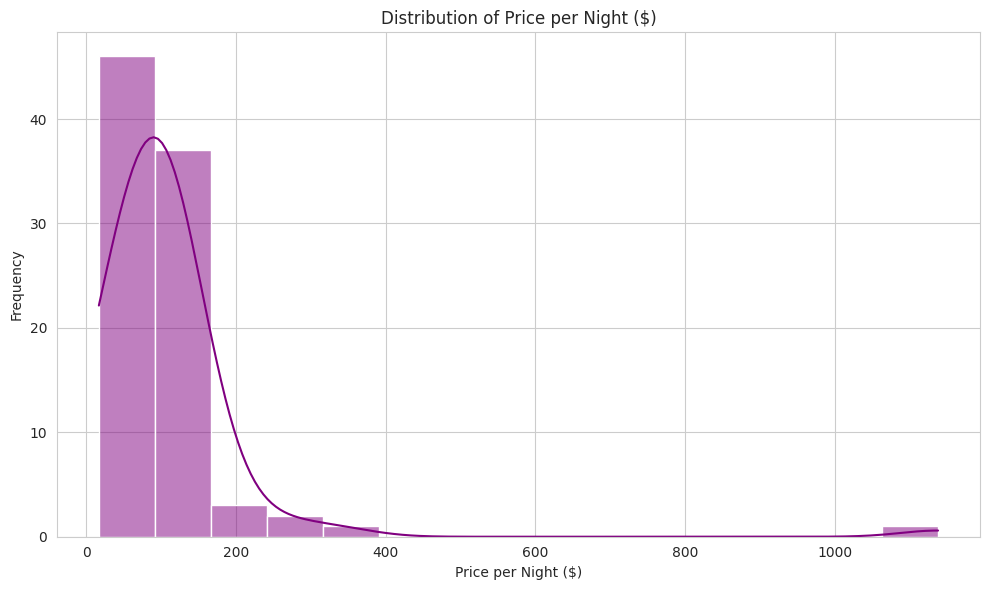

/tmp/ipython-input-3725487654.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='price per night ($)', data=df, palette='viridis')


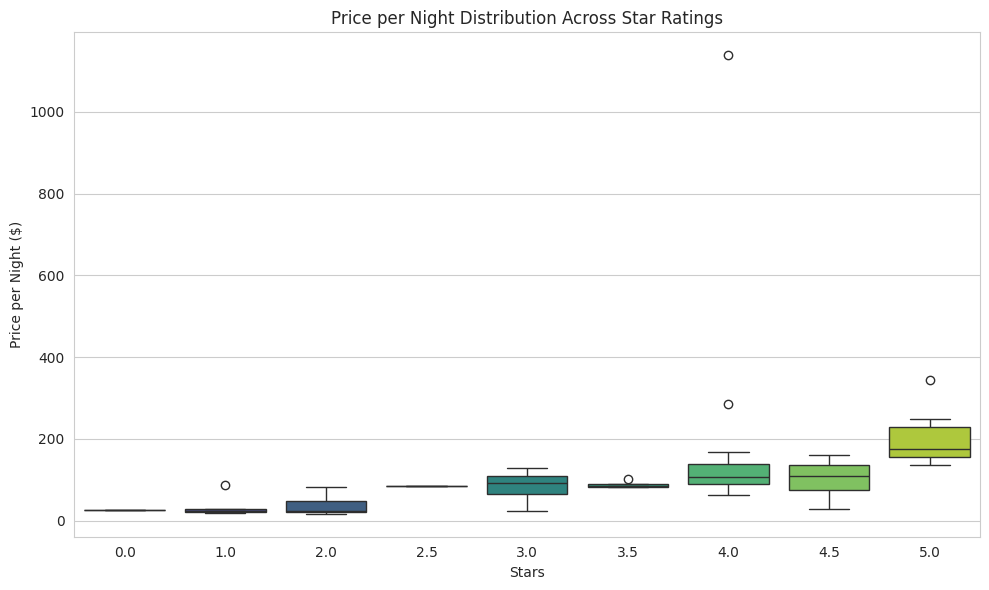

/tmp/ipython-input-3725487654.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stars', y='rating', data=df, palette='coolwarm')


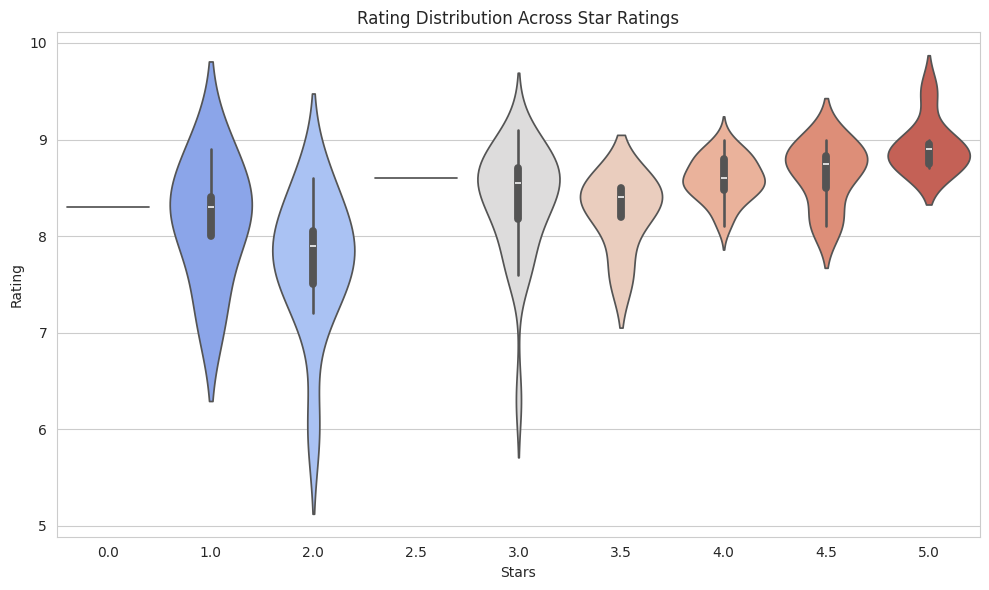

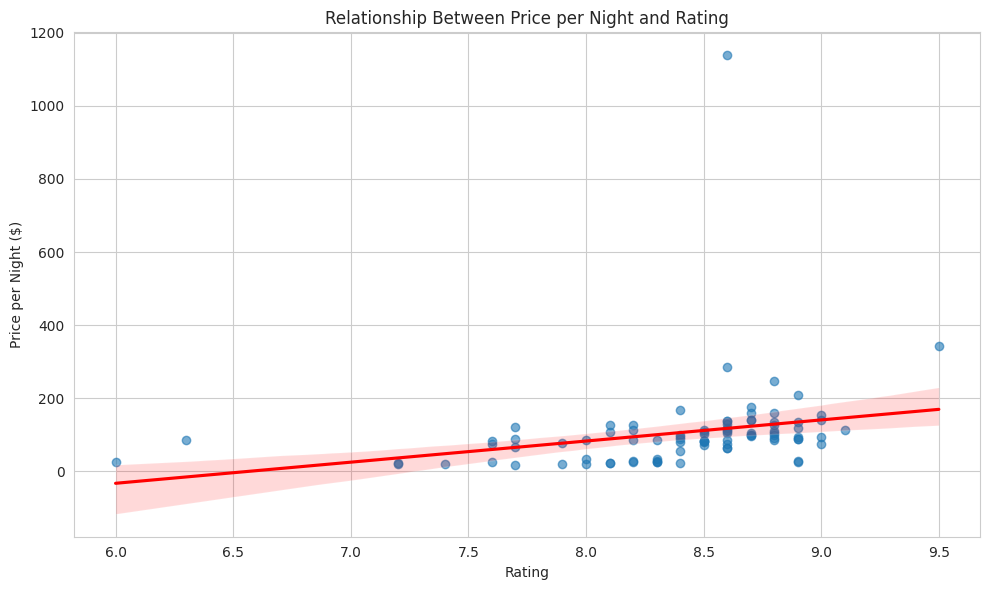

/tmp/ipython-input-3725487654.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='number of ratings', data=df, palette='mako')


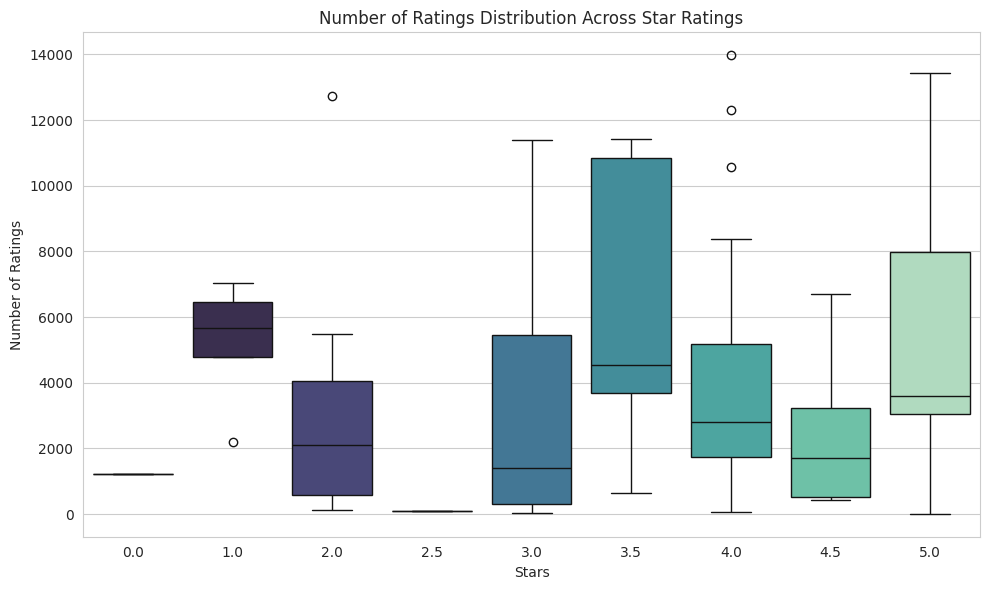

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 1. Distribution of Stars
plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Distribution of Hotel Stars')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('stars_distribution.png')
plt.show()

# 2. Distribution of Rating
plt.figure(figsize=(10, 6))
sns.histplot(x='rating', data=df, bins=10, kde=True, color='skyblue')
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.show()

# 3. Distribution of Number of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(x='number of ratings', data=df, bins=15, kde=True, color='lightgreen')
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('number_of_ratings_distribution.png')
plt.show()

# 4. Distribution of Total Price
plt.figure(figsize=(10, 6))
sns.histplot(x='total price ($)', data=df, bins=15, kde=True, color='orange')
plt.title('Distribution of Total Price ($)')
plt.xlabel('Total Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('total_price_distribution.png')
plt.show()

# 5. Distribution of Price per Night
plt.figure(figsize=(10, 6))
sns.histplot(x='price per night ($)', data=df, bins=15, kde=True, color='purple')
plt.title('Distribution of Price per Night ($)')
plt.xlabel('Price per Night ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('price_per_night_distribution.png')
plt.show()

# 6. Price per Night vs. Stars
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='price per night ($)', data=df, palette='viridis')
plt.title('Price per Night Distribution Across Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Price per Night ($)')
plt.tight_layout()
plt.savefig('price_per_night_vs_stars.png')
plt.show()

# 7. Rating vs. Stars
plt.figure(figsize=(10, 6))
sns.violinplot(x='stars', y='rating', data=df, palette='coolwarm')
plt.title('Rating Distribution Across Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Rating')
plt.tight_layout()
plt.savefig('rating_vs_stars.png')
plt.show()

# 8. Price per Night vs. Rating (with regression line)
plt.figure(figsize=(10, 6))
sns.regplot(x='rating', y='price per night ($)', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship Between Price per Night and Rating')
plt.xlabel('Rating')
plt.ylabel('Price per Night ($)')
plt.tight_layout()
plt.savefig('price_vs_rating.png')
plt.show()

# 9. Number of Ratings vs. Star Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='number of ratings', data=df, palette='mako')
plt.title('Number of Ratings Distribution Across Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.savefig('num_ratings_vs_stars.png')
plt.show()

## Step 11: Interactive Accommodation Finder
The final part of this notebook is an interactive command-line application that allows a user to find the perfect accommodation.

How it works:

1. **Get Preferences**: It first asks the user for their criteria: minimum/maximum price, minimum star rating, and minimum review score.

2. **Get Sorting Choice**: It asks how the results should be sorted (by stars, price, etc.).

3. **Filter & Display**: It filters the DataFrame based on the preferences, sorts the results, and displays a summary table of matching hotels.

4. **Show Details**: It then prompts the user to enter the name of a hotel from the list. If a valid name is entered, it displays a detailed card with all the information we scraped, including the hotel's photos.

5. **Loop**: The application will loop, allowing the user to perform new searches until they choose to quit.

In [ ]:
from IPython.display import Image, display

# Making 'name' the index for easy lookup later
df.set_index('name', inplace=True)

# --- Step 4: Interaction with the User ---

def get_preferences():
  """Gets user input for filtering criteria."""
  print("\n" + "="*50)
  print("      ✨ Welcome to the Accommodation Finder! ✨")
  print("="*50)
  try:
    min_price = float(input("Enter minimum price per night ($): "))
    max_price = float(input("Enter maximum price per night ($): "))
    min_stars = float(input("Enter minimum star rating (e.g., 3.0): "))
    min_review_score = float(input("Enter minimum review score (0.0 - 5.0): "))

    return {
      'price_range': (min_price, max_price),
      'min_stars': min_stars,
      'min_review_score': min_review_score
    }
  except ValueError:
    print("Invalid input. Please enter numbers for all criteria.")
    return None

def get_sorting_criteria():
  """Gets user input for sorting criteria."""
  print("\n--- How would you like to sort the results? ---")
  print("Sort by: [1] Stars, [2] Review Score, [3] Price per Night, [4] Number of Ratings")
  try:
    choice = int(input("Enter your choice (1-4): "))
    if choice == 1:
      return 'stars'
    elif choice == 2:
      return 'rating'
    elif choice == 3:
      return 'price per night ($)'
    elif choice == 4:
      return 'number of ratings'
    else:
      print("Invalid choice. Sorting by Review Score by default.")
      return 'rating'
  except ValueError:
    print("Invalid input. Sorting by Review Score by default.")
    return 'rating'

def filter_and_sort_accommodations(df, preferences, sort_by):
  """Filters and sorts the DataFrame based on user criteria."""
  filtered_df = df[
    (df['price per night ($)'] >= preferences['price_range'][0]) &
    (df['price per night ($)'] <= preferences['price_range'][1]) &
    (df['stars'] >= preferences['min_stars']) &
    (df['rating'] >= preferences['min_review_score'])
  ]
  return filtered_df.sort_values(by=sort_by, ascending=False)

def get_hotel_details(df, name):
  """Retrieves and prints detailed information for a specific hotel."""
  if name in df.index:
    hotel_info = df.loc[name]
    print("\n" + "="*50)
    print("      🏨 Your Selected Accommodation 🏨")
    print("="*50)
    print(f"**Name:** {name}")
    print(f"**Address:** {hotel_info['address']}")
    print(f"**Hotel Rating:** {hotel_info['stars']} Stars")
    print(f"**Review Score:** {hotel_info['rating']} out of 5.0 (based on {hotel_info['number of ratings']} reviews)")
    print(f"**Avg. Price per Night:** ${hotel_info['price per night ($)']:.2f}")
    print(f"**Total Price:** ${hotel_info['total price ($)']:.2f}")
    print(f"**Description:**\n{hotel_info['description']}")
    print("\n**Photos:**")
    for i, photo_url in enumerate(hotel_info['images'], 1):
      print(f"  Photo {i}:")
      try:
        display(Image(url=photo_url, width=400))
      except Exception as e:
        print(f"    - Could not render image from URL: {photo_url}")
        print(f"    - Error: {e}")
    print("="*50)
  else:
    print(f"\n❌ No hotel found with the name '{name}'. Please check the spelling and try again.")

# --- Main Program Loop ---
while True:
  preferences = get_preferences()
  if preferences:
    sort_by = get_sorting_criteria()

    results = filter_and_sort_accommodations(df, preferences, sort_by)

    if results.empty:
      print("\n😔 No accommodations match your criteria. Please try a different search.")
    else:
      print("\n" + "="*50)
      print("         🥳 Perfect Accommodations Found 🥳")
      print("="*50)
      print(f"Found {len(results)} accommodations matching your criteria, sorted by **{sort_by}**.")
      print(results[['stars', 'rating', 'price per night ($)', 'address']].to_string())

    # Get details for a specific hotel
    hotel_name_input = input("\n\nEnter the name of a hotel to get details (or 'quit' to exit): ")
    if hotel_name_input.lower() == 'quit':
      break
    get_hotel_details(df, hotel_name_input)

  continue_search = input("\nDo you want to perform another search? (yes/no): ")
  if continue_search.lower() != 'yes':
    break

print("\nThank you for using our accommodation finder! 😊")


      ✨ Welcome to the Accommodation Finder! ✨
Enter minimum price per night ($): 100
Enter maximum price per night ($): 200
Enter minimum star rating (e.g., 3.0): 4.0
Enter minimum review score (0.0 - 5.0): 5.0

--- How would you like to sort the results? ---
Sort by: [1] Stars, [2] Review Score, [3] Price per Night, [4] Number of Ratings
Enter your choice (1-4): 3

         🥳 Perfect Accommodations Found 🥳
Found 21 accommodations matching your criteria, sorted by **price per night ($)**.
                                                 stars  rating  price per night ($)                                                         address
name                                                                                                                                               
Eurostars Berlin                                   5.0     8.7                176.0                 Friedrichstr. 99, Mitte, Berlin, Germany, 10117
Ocak Hotel                                         4.0     8

  Photo 2:


  Photo 3:


  Photo 4:


  Photo 5:


  Photo 6:


  Photo 7:



Do you want to perform another search? (yes/no): no

Thank you for using our accommodation finder! 😊


### Setting up Chrome and Selenium in Colab  

At first, I updated the system packages so everything is fresh.  
Then I downloaded and installed the latest **Google Chrome** (since Colab doesn’t have it by default).  
After that, I installed the needed Python libraries — **selenium**, **webdriver-manager**, and **pandas**.  
This setup is required so that later I can open a Chrome browser inside Colab and scrape data with Selenium.  


In [ ]:
!apt-get update -y > /dev/null
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt-get install -y -qq ./google-chrome-stable_current_amd64.deb
!pip -q install --upgrade selenium webdriver-manager pandas

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libvulkan1:amd64.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../libvulkan1_1.3.204.1-2_amd64.deb ...
Unpacking libvulkan1:amd64 (1.3.204.1-2) ...
Selecting previously unselected package google-chrome-stable.
Preparing to unpack .../google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (140.0.7339.185-1) ...
Selecting previously unselected package mesa-vulkan-drivers:amd64.
Preparing to unpack .../mesa-vulkan-drivers_23.2.1-1ubuntu3.1~22.04.3_amd64.deb ...
Unpacking mesa-vulkan-drivers:amd64 (23.2.1-1ubuntu3.1~22.04.3) ...
Setting up libvulkan1:amd64 (1.3.204.1-2) ...
Setting up mesa-vulkan-drivers:amd64 (23.2.1-1ubuntu3.1~22.04.3) ...
Setting up google-chrome-stable (140.0.7339.185-1) ...
up

Checked the Chrome version

In [ ]:
!google-chrome --version

Google Chrome 140.0.7339.185 


This is the main part of my project where I scrape apartment data from Booking.com.  
I explain step by step what happens in the code.  


#### 1. Chrome Driver Setup  
I made a function **driver_setup()** that creates the Chrome driver with all the options I need.  
I added arguments like:  
- **--headless=new** so Chrome runs without opening a real browser window  
- **--window-size=1920,1080** to make sure page elements load as if it was a normal desktop screen  
- **--no-sandbox**, **--disable-dev-shm-usage** to avoid Colab crashes  
- **--lang=en-GB** to force English  
- **--user-agent=...** to make the scraper look like a real Windows Chrome browser  

I also removed things that reveal it is Selenium (**navigator.webdriver**) and set fake values for language and platform, so Booking does not block too quickly.  


#### 2. Helper Functions  
I wrote a few helper functions to handle different tasks:  

- **parse_stars_text(txt)** extracts the star rating (like "4 out of 5") and turns it into a number  
- **extract_stars_from_card(card)** tries multiple ways to grab stars directly from each property card  
- **get_price_text_for_card(card, driver)** runs a custom JS script to find the price  
  - First it checks my exact path (**div.cafac92f4a.fcc645b25d > span**)  
  - If that fails, it falls back to other selectors where Booking usually hides the price  
- **safe_click_cookie(driver)** automatically clicks "Accept cookies" if the banner shows up  
- **looks_like_bot_page(driver)** detects if Booking shows a bot-check page instead of real results  



#### 3. Scraping List Pages  
I set the base URL for Berlin, with dates (31 Dec 2025 – 3 Jan 2026), 1 adult, and prices in EUR.  
I looped over pages.  

For each page the driver will:  
- Open the URL with the right `offset`  
- Accept cookies if needed  
- Wait until property cards are visible  
- Collect all property cards and extract:  
  - link to the detail page  
  - price (raw text, like "€ 480")  
  - stars (from the card if available)  
- Store each result in a list of dictionaries  
- Stop early if I already collected 60 properties  


#### 4. Scraping Detail Pages  
For every property link collected, I opened the detail page and scraped more information:  
- apartment name from the header  
- location (cleaning hidden duplicate text)  
- numeric rating (overall review score)  
- image link (the first main photo)  
- description (property description text)  
- number of reviews  

If any element was missing, I just saved **None** instead of crashing.  


#### 5. Saving Results  
All scraped properties are put into a pandas DataFrame.  
I printed the first rows to check if it looks correct.  
Then I saved it to a file called `booking_apartments.csv`.  


#### 6. Closing the Driver  
At the end, I closed the Selenium driver with **driver.quit()** so the session is not left hanging.  


In short:  
This whole block does the complete scraping workflow:  
1. Open list pages  
2. Collect links, price, stars  
3. Go inside detail pages  
4. Grab name, location, rating, image, description, reviews  
5. Save everything into CSV  


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
import re, sys, json

def driver_setup():
    opts = Options()
    opts.add_argument("--headless=new")
    opts.add_argument("--window-size=1920,1080")
    opts.add_argument("--no-sandbox")
    opts.add_argument("--disable-dev-shm-usage")
    opts.add_argument("--lang=en-GB")
    opts.add_argument("--disable-blink-features=AutomationControlled")
    opts.add_experimental_option("excludeSwitches", ["enable-automation"])
    opts.add_experimental_option("useAutomationExtension", False)
    opts.add_argument(
        "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/126.0.0.0 Safari/537.36"
    )
    opts.binary_location = "/usr/bin/google-chrome"

    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=opts)

    driver.execute_cdp_cmd(
        "Page.addScriptToEvaluateOnNewDocument",
        {"source": """
            Object.defineProperty(navigator, 'webdriver', {get: () => undefined});
            Object.defineProperty(navigator, 'languages', {get: () => ['en-GB','en']});
            Object.defineProperty(navigator, 'platform', {get: () => 'Win32'});
        """}
    )
    return driver


def parse_stars_text(txt):
    if not txt: return None
    m = re.search(r'([1-5](?:\.\d)?)\s*(?:out of|/)\s*5', txt, re.I) or re.search(r'\b([1-5])\b', txt)
    return int(float(m.group(1))) if m else None

def extract_stars_from_card(card):
    try:
        el = card.find_element(By.CSS_SELECTOR, '[role="button"][aria-label*="out of"]')
        return parse_stars_text(el.get_attribute('aria-label'))
    except Exception:
        pass

    try:
        for el in card.find_elements(By.CSS_SELECTOR, '[aria-label*="out of"]'):
            stars = parse_stars_text(el.get_attribute('aria-label'))
            if stars is not None:
                return stars
    except Exception:
        pass

    try:
        el = card.find_element(By.CSS_SELECTOR, '[data-testid="rating-circles"]')
        raw = card.parent.execute_script("return arguments[0].closest('[aria-label]')?.getAttribute('aria-label')", el)
        return parse_stars_text(raw)
    except Exception:
        return None

def get_price_text_for_card(card, driver):
    """
    Return the displayed price TEXT for this list card.
    Uses your JS-path-style target first, then robust fallbacks.
    """
    return driver.execute_script("""
      const card = arguments[0];

      // 1) anchor to the list price box (same area as your screenshot)
      const box = card.querySelector('[data-testid="availability-rate-information"], [data-testid="availability-cta"]');
      if (!box) return null;

      // 2) YOUR JS path (relative to the card’s price box):
      //    .cafac92f4a.fcc645b25d > span
      //    (these hashed classes change, but we’ll try them first because you asked)
      const exact = box.querySelector('div.cafac92f4a.fcc645b25d > span');
      if (exact) return (exact.textContent || '').replace(/[\u00a0\u202f]/g,' ').trim();

      // 3) Fallback A: the “Price € 490” label you highlighted
      const label = box.querySelector('div.bc946a29db');
      if (label) return (label.textContent || '').replace(/[\u00a0\u202f]/g,' ').trim();

      // 4) Fallback B: Booking’s main price span (sometimes aria-hidden but still contains the number)
      const span = box.querySelector('span[data-testid="price-and-discounted-price"]');
      if (span) return (span.textContent || '').replace(/[\u00a0\u202f]/g,' ').trim();

      return null;
    """, card)

def safe_click_cookie(driver, timeout=6):
    candidates = [
        (By.ID, "onetrust-accept-btn-handler"),
        (By.CSS_SELECTOR, "button[aria-label*='Accept'],button[aria-label*='accept']"),
        (By.CSS_SELECTOR, "button:has(span:contains('Accept'))"),
        (By.XPATH, "//button[contains(., 'Accept') or contains(., 'agree') or contains(., 'Agree')]"),
    ]
    for how, what in candidates:
        try:
            btn = WebDriverWait(driver, timeout).until(EC.element_to_be_clickable((how, what)))
            btn.click()
            time.sleep(1)
            return True
        except Exception:
            pass
    return False

def looks_like_bot_page(driver):
    html = driver.page_source.lower()
    suspicious = [
        "unusual traffic", "verify you are a human", "are you a robot",
        "temporarily blocked", "cf-error-details", "access denied"
    ]
    return any(s in html for s in suspicious)

driver = driver_setup()
wait = WebDriverWait(driver, 20)

base_url = (
    "https://www.booking.com/searchresults.en-gb.html"
    "?ss=Berlin&dest_id=-1746443&dest_type=city"
    "&checkin=2025-12-31&checkout=2026-01-03"
    "&group_adults=1&group_children=0&no_rooms=1"
    "&selected_currency=EUR&lang=en-gb"
)

properties = []
seen_links = set()

try:
    rows = 25
    max_pages = 6
    for page in range(max_pages):
        offset = page * rows
        url = f"{base_url}&rows={rows}&offset={offset}"
        driver.get(url)

        safe_click_cookie(driver)

        if looks_like_bot_page(driver):
            print("Stopped: looks like a bot-check/blocked page.")
            break

        try:
            wait.until(
                EC.any_of(
                    EC.presence_of_element_located((By.CSS_SELECTOR, '[data-testid="property-card"]')),
                    EC.presence_of_element_located((By.CSS_SELECTOR, '[data-testid="no-results"]')),
                    EC.presence_of_element_located((By.CSS_SELECTOR, '#search_results_table'))
                )
            )
        except Exception:
            print(f"Timeout waiting for results on page {page+1}.")
            break

        cards = driver.find_elements(By.CSS_SELECTOR, 'div[data-testid="property-card"]')
        print(f"Page {page+1}: found {len(cards)} cards")

        if not cards:
            break

        for card in cards:
            try:
                link_elem = card.find_element(By.CSS_SELECTOR, 'a[data-testid="title-link"]')
                href = link_elem.get_attribute("href")
                if not href or href in seen_links:
                    continue

                price_info = get_price_text_for_card(card, driver)

                stars_on_list = extract_stars_from_card(card)

                properties.append({
                    'link': href,
                    'price_raw': price_info,
                    'stars': stars_on_list,
                })
                seen_links.add(href)
            except Exception:
                continue

        if len(properties) >= 60:
            break

    print(f"Total properties scraped from list pages: {len(properties)}")


    for prop in properties:
        try:
            driver.get(prop["link"])
            if looks_like_bot_page(driver):
                print("Detail page blocked; skipping.")
                continue

            try:
                name_el = wait.until(EC.presence_of_element_located(
                    (By.CSS_SELECTOR, 'h2.ddb12f4f86.pp-header__title, h2[data-capla-component="b-property-web-page/title"]')
                ))
                prop["apartment_name"] = name_el.text.strip()
            except Exception:
                prop["apartment_name"] = None


            try:
                loc_el = wait.until(EC.presence_of_element_located(
                    (By.CSS_SELECTOR, 'div.b99b6ef58f.cb4b7a25d9.b06461926f, div[data-testid="address"]')
                ))

                hidden_children = loc_el.find_elements(By.CSS_SELECTOR, '[aria-hidden="true"]')
                text = loc_el.text
                for child in hidden_children:
                    if child.text:
                        text = text.replace(child.text, '').strip()
                prop["location"] = text.strip()
            except Exception:
                prop["location"] = None


            try:
                rating_element = driver.find_element(By.ID, "js--hp-gallery-scorecard")
                prop["numeric_rating"] = rating_element.get_attribute("data-review-score")
            except Exception:

                try:
                    score_el = driver.find_element(By.CSS_SELECTOR, '[data-testid="review-score-component"] div[aria-label]')
                    prop["numeric_rating"] = score_el.get_attribute("aria-label")
                except Exception:
                    prop["numeric_rating"] = None


            try:
                outer_div = driver.find_element(By.CSS_SELECTOR, 'div.f6e3a11b0d.a19a26a18c.ed582438e0.ac30880487.e95943ce9b.db48780985.f65059a889, div[data-testid="image-viewer-thumbnails"]')
                img = outer_div.find_element(By.TAG_NAME, 'img')
                prop["image_link"] = img.get_attribute("src")
            except Exception:
                prop["image_link"] = None


            try:
                desc = driver.find_element(By.CSS_SELECTOR, 'p[data-testid="property-description"], #property_description_content')
                prop["description"] = desc.text.replace("\n", " ").strip()
            except Exception:
                prop["description"] = None


            try:
                reviews_text = driver.execute_script("""
                    const el = document.querySelector(
                        "#js--hp-gallery-scorecard a div div div div.aa225776f2.ca9d921c46.e951e75167 > div.fff1944c52.fb14de7f14.eaa8455879"
                    ) || document.querySelector('[data-testid="review-score-component"] ~ div');
                    return el ? el.textContent.trim() : null;
                """)
                match = re.search(r'(\d[\d,]*)', reviews_text) if reviews_text else None
                prop["number_of_reviews"] = match.group(1).replace(",", "") if match else None
            except Exception:
                prop["number_of_reviews"] = None

            print(f"Scraped: {prop.get('apartment_name')} - Price on list: {prop.get('price_raw')}")
        except Exception as e:
            print(f"Error scraping {prop.get('link','')}: {e}")

    df = pd.DataFrame(properties)
    print(df.head())
    df.to_csv("booking_apartments.csv", index=False)
    print("Saved scraped data to booking_apartments.csv")

finally:
    driver.quit()
    print("Driver session closed.")


Page 1: found 25 cards
Page 2: found 25 cards
Page 3: found 25 cards
Total properties scraped from list pages: 75
Scraped: Come Inn Berlin Kurfürstendamm - Price on list: € 330€ 231
Scraped: martas Hotel Berlin-Mitte - Price on list: € 266
Scraped: Vienna House by Wyndham Andel's Berlin - Price on list: € 219
Scraped: Mercure Hotel MOA Berlin - Price on list: € 264€ 233
Scraped: Motel One Berlin-Alexanderplatz - Price on list: € 345
Scraped: Garner Hotel Berlin - Mitte by IHG - Price on list: € 280
Scraped: Monbijou Hotel - Price on list: € 319
Scraped: Wunderschönes Single Apartment - Price on list: € 308
Scraped: Vienna House Easy by Wyndham Berlin Prenzlauer Berg - Price on list: € 206
Scraped: IntercityHotel Berlin Hauptbahnhof - Price on list: € 301
Scraped: Air in Berlin - Price on list: € 211
Scraped: HENRI Hotel Berlin Kurfürstendamm - Price on list: € 330
Scraped: TITANIC Gendarmenmarkt Berlin - Price on list: € 572
Scraped: martas Hotel Allegra Berlin - Price on list: € 267
S

If you did not run the previous cell, you can just read my dataset with pandas.

Checking first 5 rows of our DataFrame

In [ ]:
df = pd.read_csv('booking_apartments.csv')
df.head()

,link,price_raw,stars,apartment_name,location,numeric_rating,image_link,description,number_of_reviews
0,https://www.booking.com/hotel/de/kurfurstendam...,€ 330€ 231,3.0,Come Inn Berlin Kurfürstendamm,"Kurfürstendamm 180, Charlottenburg-Wilmersdorf...",7.7,https://cf.bstatic.com/xdata/images/hotel/max1...,This hotel on Berlin's Kurfürstendamm shopping...,3119
1,https://www.booking.com/hotel/de/augustinenhof...,€ 266,NaN,martas Hotel Berlin-Mitte,"Auguststraße 82, Mitte, 10117 Berlin, Germany",8.8,https://cf.bstatic.com/xdata/images/hotel/max1...,This boutique hotel is a beautiful historic bu...,1963
2,https://www.booking.com/hotel/de/andel-s-by-vi...,€ 219,4.0,Vienna House by Wyndham Andel's Berlin,"Landsberger Allee 106, Lichtenberg, 10369 Berl...",8.1,https://cf.bstatic.com/xdata/images/hotel/max1...,"Offering a bar with panoramic views of Berlin,...",9394
3,https://www.booking.com/hotel/de/moa-berlin.en...,€ 264€ 233,4.0,Mercure Hotel MOA Berlin,"Stephanstr. 41, Mitte, 10559 Berlin, Germany",8.5,https://cf.bstatic.com/xdata/images/hotel/max1...,"Offering a unique atrium and free WiFi, this 4...",5608
4,https://www.booking.com/hotel/de/motel-one-ber...,€ 345,3.0,Motel One Berlin-Alexanderplatz,"11 Grunerstraße, Mitte, 10179 Berlin, Germany",8.7,https://cf.bstatic.com/xdata/images/hotel/max1...,Prime Location: Motel One Berlin-Alexanderplat...,16418


### Cleaning the Price Column  

Here I cleaned the **price_raw** column to make it consistent.  

- First, I converted everything in the column to string with **astype(str)**  
- Then I replaced special spaces like non-breaking space and narrow no-break space with a normal space  
- After that, I used **extract()** with a regex to pull out only the euro price part (like "€ 480")  
- Finally, I stripped extra spaces with **str.strip()**  

Now the price column is cleaned and ready for further processing.  


In [ ]:
df['price_raw'] = df["price_raw"].astype(str).str.replace(r'[\u00A0\u202F]', ' ', regex=True).str.extract(r'(€\s*\d[\d\s.,]*)', expand=False).str.strip()

In [ ]:
df.head()

,link,price_raw,stars,apartment_name,location,numeric_rating,image_link,description,number_of_reviews
0,https://www.booking.com/hotel/de/kurfurstendam...,€ 330,3.0,Come Inn Berlin Kurfürstendamm,"Kurfürstendamm 180, Charlottenburg-Wilmersdorf...",7.7,https://cf.bstatic.com/xdata/images/hotel/max1...,This hotel on Berlin's Kurfürstendamm shopping...,3119
1,https://www.booking.com/hotel/de/augustinenhof...,€ 266,NaN,martas Hotel Berlin-Mitte,"Auguststraße 82, Mitte, 10117 Berlin, Germany",8.8,https://cf.bstatic.com/xdata/images/hotel/max1...,This boutique hotel is a beautiful historic bu...,1963
2,https://www.booking.com/hotel/de/andel-s-by-vi...,€ 219,4.0,Vienna House by Wyndham Andel's Berlin,"Landsberger Allee 106, Lichtenberg, 10369 Berl...",8.1,https://cf.bstatic.com/xdata/images/hotel/max1...,"Offering a bar with panoramic views of Berlin,...",9394
3,https://www.booking.com/hotel/de/moa-berlin.en...,€ 264,4.0,Mercure Hotel MOA Berlin,"Stephanstr. 41, Mitte, 10559 Berlin, Germany",8.5,https://cf.bstatic.com/xdata/images/hotel/max1...,"Offering a unique atrium and free WiFi, this 4...",5608
4,https://www.booking.com/hotel/de/motel-one-ber...,€ 345,3.0,Motel One Berlin-Alexanderplatz,"11 Grunerstraße, Mitte, 10179 Berlin, Germany",8.7,https://cf.bstatic.com/xdata/images/hotel/max1...,Prime Location: Motel One Berlin-Alexanderplat...,16418


### Creating a Structured DataFrame  

After scraping, I created a new DataFrame with cleaner and more structured columns.  

- **number_of_nights = 3** since I searched for 3 nights in the booking  
- Made a new DataFrame `df_new` and added columns:  
  - **name** from apartment_name  
  - **address** from location  
  - **stars** from stars  
  - **rating** from numeric_rating  
  - **number of ratings** from number_of_reviews  
  - **total price ($)** by removing the euro sign and converting to float  
  - **price per night (\$)** by dividing total price by number of nights  
  - **description** from description  
  - **images** as a string with the image link  

Finally, I saved everything to a new CSV file called **booking_apartments_structured.csv**.  


In [ ]:
number_of_nights = 3
df_new = pd.DataFrame()
df_new['name'] = df['apartment_name']
df_new['address'] = df['location']
df_new['stars'] = df['stars']
df_new['rating'] = df['numeric_rating']
df_new['number of ratings'] = df['number_of_reviews']
df_new['total price ($)'] = df['price_raw'].replace({'€': ''}, regex=True).astype(float)  # remove euro sign
df_new['price per night ($)'] = df_new['total price ($)'] / number_of_nights
df_new['description'] = df['description']
df_new['images'] = df.apply(lambda row: f"[\'{row['image_link']}\']", axis=1)

df_new.to_csv("booking_apartments_structured.csv", index=False)

In [ ]:
df_new.head()

,name,address,stars,rating,number of ratings,total price ($),price per night ($),description,images
0,Come Inn Berlin Kurfürstendamm,"Kurfürstendamm 180, Charlottenburg-Wilmersdorf...",3.0,7.7,3119,330.0,110.000000,This hotel on Berlin's Kurfürstendamm shopping...,['https://cf.bstatic.com/xdata/images/hotel/ma...
1,martas Hotel Berlin-Mitte,"Auguststraße 82, Mitte, 10117 Berlin, Germany",NaN,8.8,1963,266.0,88.666667,This boutique hotel is a beautiful historic bu...,['https://cf.bstatic.com/xdata/images/hotel/ma...
2,Vienna House by Wyndham Andel's Berlin,"Landsberger Allee 106, Lichtenberg, 10369 Berl...",4.0,8.1,9394,219.0,73.000000,"Offering a bar with panoramic views of Berlin,...",['https://cf.bstatic.com/xdata/images/hotel/ma...
3,Mercure Hotel MOA Berlin,"Stephanstr. 41, Mitte, 10559 Berlin, Germany",4.0,8.5,5608,264.0,88.000000,"Offering a unique atrium and free WiFi, this 4...",['https://cf.bstatic.com/xdata/images/hotel/ma...
4,Motel One Berlin-Alexanderplatz,"11 Grunerstraße, Mitte, 10179 Berlin, Germany",3.0,8.7,16418,345.0,115.000000,Prime Location: Motel One Berlin-Alexanderplat...,['https://cf.bstatic.com/xdata/images/hotel/ma...


Here I will put my code which I run locally, so here it can not be run, but if you want, you can run it locally:)

just download this packages
```python
pip install selenium webdriver-manager pandas


Copy and paste this code to your local machine compiler, I was using VS Code:

```python
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
import re


def driver_setup():
    chrome_options = Options()
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    service = Service(ChromeDriverManager().install())
    return webdriver.Chrome(service=service, options=chrome_options)


driver = driver_setup()
driver.maximize_window()
wait = WebDriverWait(driver, 15)


url = (
    "https://www.booking.com/searchresults.en-gb.html?"
    "ss=%D0%91%D0%B5%D1%80%D0%BB%D0%B8%D0%BD&dest_id=-1746443&dest_type=city"
    "&checkin=2025-12-31&checkout=2026-01-03&group_adults=1&group_children=0"
)


try:
    driver.get(url)

    accept_button = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.ID, "onetrust-accept-btn-handler"))
    )
    accept_button.click()
    print("Cookie acceptance button clicked successfully!")
    time.sleep(2)

    SCROLL_PAUSE_TIME = 2
    properties = []
    last_height = driver.execute_script("return document.body.scrollHeight")

    while len(properties) < 50:
      
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        time.sleep(2)  

        property_cards = driver.find_elements(By.CSS_SELECTOR, 'div[data-testid="property-card"]')
        for card in property_cards:
            try:
               
                link_elem = card.find_element(By.CSS_SELECTOR, 'h3.a97d37cded a[data-testid="title-link"]')
                href = link_elem.get_attribute('href')

                price_text = driver.execute_script("""
                    return arguments[0].querySelector(
                        "div > div > span.b87c397a13.f2f358d1de.ab607752a2"
                    )?.textContent.trim() || null;
                """, card)

                properties.append({
                    'link': href,
                    'price_raw': price_text
                })
            except Exception:
                pass

       
        unique_props = {p['link']: p for p in properties}
        properties = list(unique_props.values())

        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
        
            break
        last_height = new_height

    print(f"Total properties scraped: {len(properties)}")

    for prop in properties:
        try:
            driver.get(prop['link'])

  
            apartment_name_elem = WebDriverWait(driver, 15).until(
                EC.presence_of_element_located(
                    (By.CSS_SELECTOR, 'h2.ddb12f4f86.pp-header__title')
                )
            )
            prop['apartment_name'] = apartment_name_elem.text.strip()

       
            location_div = WebDriverWait(driver, 15).until(
                EC.presence_of_element_located(
                    (By.CSS_SELECTOR, 'div.b99b6ef58f.cb4b7a25d9.b06461926f')
                )
            )
            hidden_children = location_div.find_elements(By.CSS_SELECTOR, '[aria-hidden="true"]')
            location_text = location_div.text
            for child in hidden_children:
                location_text = location_text.replace(child.text, '').strip()
            prop['location'] = location_text

        
            try:
                rating_elem = driver.find_element(By.CSS_SELECTOR, 'span[data-testid="rating-circles"]')
                aria_label = rating_elem.get_attribute('aria-label')
                rating_match = re.search(r'(\d+)', aria_label)
                prop['stars'] = int(rating_match.group(1)) if rating_match else None
            except Exception:
                prop['stars'] = None

          
            try:
                rating_element = driver.find_element(By.ID, "js--hp-gallery-scorecard")
                prop['numeric_rating'] = rating_element.get_attribute("data-review-score")
            except Exception:
                prop['numeric_rating'] = None

      
            try:
                outer_div = driver.find_element(By.CSS_SELECTOR, 'div.f6e3a11b0d.a19a26a18c.ed582438e0.ac30880487.e95943ce9b.db48780985.f65059a889')
                img_elem = outer_div.find_element(By.TAG_NAME, 'img')
                prop['image_link'] = img_elem.get_attribute('src')
            except Exception:
                prop['image_link'] = None

        
            try:
                desc_elem = driver.find_element(By.CSS_SELECTOR, 'p[data-testid="property-description"]')
                description = desc_elem.text.replace('\n', ' ').strip()
                prop['description'] = description
            except Exception:
                prop['description'] = None

            try:
                reviews_text = driver.execute_script("""
                    return document.querySelector(
                        "#js--hp-gallery-scorecard > a > div > div > div > div.aa225776f2.ca9d921c46.e951e75167 > div.fff1944c52.fb14de7f14.eaa8455879"
                    )?.textContent.trim() || null;
                """)
                match = re.search(r'(\d[\d,]*)', reviews_text) if reviews_text else None
                prop['number_of_reviews'] = match.group(1).replace(',', '') if match else None
            except Exception:
                prop['number_of_reviews'] = None

            print(f"Scraped: {prop['apartment_name']} - Price on list: {prop['price_raw']}")

        except Exception as e:
            print(f"Error scraping {prop.get('link', '')}: {e}")

  
    df = pd.DataFrame(properties)
    print(df.head())
    df.to_csv('booking_apartments.csv', index=False)
    print("Saved scraped data to booking_apartments.csv")

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    driver.quit()
    print("Driver session closed.")


The next steps for manipulation with dataframe are the same

### 🔹 Step 1: Install Google Chrome (latest stable)

Google Colab does not come with the latest version of Google Chrome by default.  
We need Chrome because Selenium will drive it to open Kayak and scrape data.

- `wget` downloads the latest `.deb` package of Google Chrome for Linux (Debian/Ubuntu).  
- `apt-get install` installs it on the Colab machine.

> ⚠️ Each time you restart Colab, you must re-run this step.



In [ ]:
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt-get install -y -qq ./google-chrome-stable_current_amd64.deb

Selecting previously unselected package libvulkan1:amd64.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../libvulkan1_1.3.204.1-2_amd64.deb ...
Unpacking libvulkan1:amd64 (1.3.204.1-2) ...
Selecting previously unselected package google-chrome-stable.
Preparing to unpack .../google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (140.0.7339.127-1) ...
Selecting previously unselected package mesa-vulkan-drivers:amd64.
Preparing to unpack .../mesa-vulkan-drivers_23.2.1-1ubuntu3.1~22.04.3_amd64.deb ...
Unpacking mesa-vulkan-drivers:amd64 (23.2.1-1ubuntu3.1~22.04.3) ...
Setting up libvulkan1:amd64 (1.3.204.1-2) ...
Setting up mesa-vulkan-drivers:amd64 (23.2.1-1ubuntu3.1~22.04.3) ...
Setting up google-chrome-stable (140.0.7339.127-1) ...
update-alternatives: using /usr/bin/google-chrome-stable to provide /usr/bin/x-www-browser (x-www-browser) in auto mode
update-alternatives: using /usr/bin/google-chrome-stable to provide /us

### 🔹 Step 2: Install ChromeDriver (matching Chrome version)

Selenium requires **ChromeDriver** to control Google Chrome.  
The driver version **must match** the installed Chrome version (here: Chrome 140).

What this does:  
1. Sets the exact ChromeDriver download URL from Google’s official storage.  
2. Creates a temporary directory (`mktemp -d`) to avoid clutter.  
3. Downloads and unzips the driver archive.  
4. Installs the `chromedriver` binary into `/usr/bin/` (system path).  
5. Cleans up temporary files.  
6. Prints both **Google Chrome** and **ChromeDriver** versions for confirmation.  


In [ ]:
%%bash
set -euo pipefail

# Exact driver matching your Chrome 140
ZIP_URL="https://storage.googleapis.com/chrome-for-testing-public/140.0.7339.127/linux64/chromedriver-linux64.zip"

# Work in a temp dir to avoid clobbering system folders
TMPDIR="$(mktemp -d)"
cd "$TMPDIR"

# Download and unzip
wget -q "$ZIP_URL" -O driver.zip
unzip -q driver.zip

# Install the driver binary to /usr/bin
install -m 0755 chromedriver-linux64/chromedriver /usr/bin/chromedriver

# Clean up
cd /
rm -rf "$TMPDIR" /usr/bin/chromedriver-linux64 || true

# Confirm versions
google-chrome --version || true
/usr/bin/chromedriver --version


Google Chrome 140.0.7339.127 
ChromeDriver 140.0.7339.127 (9412745860d8c3dfed9cf38f5daa943b163f8c69-refs/branch-heads/7339@{#1849})


### 🔹 Step 3: Install Selenium Stealth

Some websites (like Kayak) detect Selenium automation and block access with bot checks.  
The [`selenium-stealth`](https://pypi.org/project/selenium-stealth/) package helps to reduce detection by:

- Masking common Selenium fingerprints (e.g., WebDriver flags, `navigator.webdriver` property).  
- Adjusting Chrome options to appear more like a real user browser.  
- Randomizing certain browser characteristics.




In [ ]:
!pip install selenium-stealth


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.15.0
    Uninstalling typing_extensions-4.15.0:
      Successfully uninstalled typing_extensions-4.15.0


### 🔹 Step 4: Import Required Libraries

Here we import all the packages needed for our scraping:

- **Selenium Core**
  - `webdriver` → to control Chrome
  - `Service`, `Options` → to configure ChromeDriver
  - `WebDriverWait`, `EC` → for explicit waits (wait until elements load)
  - `By` → to locate elements with XPath, CSS, etc.

- **Selenium Stealth**
  - `stealth` → helps disguise Selenium to avoid bot detection.

- **Utilities**
  - `urljoin`, `urlparse` → to handle relative and absolute URLs
  - `pandas` → to store results in DataFrames and export CSV
  - `re` → regex for cleaning/extracting numbers (price, ratings, etc.)
  - `time` → to add polite pauses between actions



In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

from selenium_stealth import stealth
from urllib.parse import urljoin, urlparse

import pandas as pd
import re
import time


### 🔹 Step 5: Configure & Launch Chrome with Stealth

- **Chrome Options**:
  - `--headless=new` → run without opening a visible browser window (important in Colab).
  - `--no-sandbox` & `--disable-dev-shm-usage` → required for stable execution inside Colab.

- **ChromeDriver Setup**:
  - We explicitly point Selenium to the ChromeDriver binary installed earlier (`/usr/bin/chromedriver`).

- **Stealth Configuration**:
  - `stealth()` disguises Selenium by spoofing properties like:
    - `languages`, `vendor`, `platform`, `webgl_vendor`, `renderer`
  - This helps avoid bot detection on websites like Kayak.

- **WebDriverWait**:
  - Defines a global wait of 15 seconds, so Selenium will pause until elements load.

- **Navigate to Kayak**:
  - Opens the Kayak Berlin hotels search page with pre-filled dates and English language.
  - Prints the page title to confirm successful navigation.


In [ ]:
opts = Options()
opts.add_argument("--headless=new")
opts.add_argument("--no-sandbox")
opts.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(service=Service("/usr/bin/chromedriver"), options=opts)
stealth(
    driver,
    languages=["en-US", "en"],
    vendor="Google Inc.",
    platform="MacIntel",
    webgl_vendor="Intel Inc.",
    renderer="Intel Iris OpenGL Engine",
    fix_hairline=True,
)
wait = WebDriverWait(driver, 15)

driver.get("https://www.kayak.com/hotels/Berlin,Germany-p36116/2025-12-31/2026-01-02/1adults;map?ucs=11vhekb&sort=rank_a&lang=en")
print("✓ Browser opened:", driver.title)

✓ Browser opened: Berlin, Germany, 12/31 – 1/2


### 🔹 Step 6: Define Helper Functions  

These utility functions simplify extracting text, numbers, and handling pop-ups while scraping.  

- **`_text(wait, by, sel)`**  
  - Waits for an element to appear, then returns its `.text` value.  
  - Returns `None` if the element isn’t found in time.  

- **`_float(s)`**  
  - Extracts a floating-point number from a string (handles commas, decimals, thin spaces).  
  - Used for parsing ratings, stars, and prices.  

- **`_int(s)`**  
  - Extracts an integer from a string (removes extra symbols, spaces, commas).  
  - Used for parsing review counts.  

- **`close_popups_if_any()`**  
  - Closes any unexpected pop-up dialogs (like overlays or modals).  
  - Looks for common “Close” buttons and clicks them.  

- **`_click_location_tab()`**  
  - Ensures the *Location* tab is open so the distance to the city centre is visible.  
  - If the tab isn’t clickable, it tries scrolling to the “What’s nearby” map section instead.  
  - Adds small pauses (`time.sleep`) for stability.  


In [ ]:
def _text(wait, by, sel):
    try:
        return wait.until(EC.presence_of_element_located((by, sel))).text.strip()
    except Exception:
        return None

def _float(s):
    if not s:
        return None
    s = s.replace("\u202f", " ")  # thin spaces
    m = re.search(r"-?\d+(?:[.,]\d+)?", s)
    return float(m.group(0).replace(",", ".")) if m else None

def _int(s):
    if not s:
        return None
    s = s.replace("\u202f", "")
    m = re.search(r"\d[\d,.\s]*", s)
    return int(re.sub(r"[^\d]", "", m.group(0))) if m else None

def close_popups_if_any():
    for xp in [
        "//button[@aria-label='Close']",
        "//button[contains(., 'Close')]",
    ]:
        try:
            btn = driver.find_element(By.XPATH, xp)
            driver.execute_script("arguments[0].click();", btn)
        except Exception:
            pass

# --- small utilities for this page ---

def _click_location_tab():
    """Open the Location tab so the nearby list (with city-centre distance) is rendered."""
    try:
        tab = driver.find_element(
            By.XPATH,
            "//a[normalize-space()='Location' or normalize-space()='Location']"
        )
        driver.execute_script("arguments[0].click();", tab)
        time.sleep(1.0)
    except Exception:
        # sometimes it's already open or the anchor is scrolled out; try scrolling to the map container
        try:
            map_hdr = driver.find_element(By.XPATH, "//*[contains(@class,'location-header') or contains(.,'What’s nearby')]")
            driver.execute_script("arguments[0].scrollIntoView({block:'center'});", map_hdr)
            time.sleep(0.6)
        except Exception:
            pass

### 🔹 Step 7: Handle Cookie Consent  

Websites like Kayak often show a cookie consent banner that must be accepted before scraping.  
This helper function automates that step.  

- **`accept_kayak_cookies()`**  
  - Loops through a list of possible XPath selectors for the *Accept cookies* button.  
  - Tries different strategies:
    - Looks for Kayak’s solid style button (`RxNS` with `variant-solid`).  
    - Falls back to a more generic button (`RxNS`).  
    - As a backup, looks for buttons containing text like *Accept*, *agree*, or *OK*.  
  - If found, clicks the button using JavaScript (`execute_script`) for reliability.  
  - Prints confirmation (`✓ Accepted cookies`) when successful.  
  - If no banner is found (maybe already accepted), it prints a note instead.  


In [ ]:
def accept_kayak_cookies():
    # try the main solid button Kayak uses
    for xp in [
        "//button[contains(@class,'RxNS') and contains(@class,'variant-solid')]",  # generic solid button
        "//button[contains(@class,'RxNS')]",                                       # fallback
        "//button[contains(., 'Accept') or contains(., 'agree') or contains(., 'OK')][1]",
    ]:
        try:
            btn = wait.until(EC.element_to_be_clickable((By.XPATH, xp)))
            driver.execute_script("arguments[0].click();", btn)
            print("✓ Accepted cookies")
            return
        except Exception:
            pass
    print("• No cookie banner found (or already accepted)")


### 🔹 Step 8: Collect Hotel Links (Pages 1 & 2)

Before scraping details, we need to collect all the hotel links from the Kayak search results.  
Two helper functions are used here:

---

#### 1. `collect_hotels_on_page(driver, wait)`
- Ensures that the hotel cards are loaded on the current results page.  
- Finds all hotel **anchors** (`<a>`) inside the `hotel-name` div.  
- Extracts:
  - **Hotel name** (text).  
  - **Hotel URL** (href).  
- If the URL starts with `/`, it prefixes the Kayak base URL (`https://www.kayak.com`).  
- Removes duplicates while preserving order.  
- Returns a list of `(name, url)` pairs.

---

#### 2. `collect_links_p1_p2(driver, wait)`
- Collects hotel links from **Page 1**:  
  - Scrolls the page a bit to trigger lazy-loading.  
  - Calls `collect_hotels_on_page`.  
- Navigates to **Page 2**:  
  - Scrolls to the bottom, clicks the *Page 2* button.  
  - Waits until the new list is loaded.  
- Collects links from Page 2 using the same method.  
- Merges Page 1 and Page 2 results, removing duplicates.  
- Prints counts for debugging (Page 1, Page 2, and total unique).  
- Returns the combined list of hotel `(name, url)` pairs.  

---



In [ ]:
BASE = "https://www.kayak.com"

def collect_hotels_on_page(driver, wait):
    """Collect (name, url) pairs from the CURRENT results page."""
    # make sure cards are present
    wait.until(EC.presence_of_all_elements_located(
        (By.XPATH, "//div[contains(@class,'hotel-name')]")
    ))

    # grab the anchors that hold the hotel name + link
    anchors = driver.find_elements(
        By.XPATH,
        "//div[contains(@class,'hotel-name')]//a[contains(@class,'big-name') or starts-with(@href,'/hotels/')]"
    )

    pairs = []
    seen = set()
    for a in anchors:
        name = (a.text or "").strip()
        href = (a.get_attribute("href") or "").strip()
        if href.startswith("/"):
            href = urljoin(BASE, href)
        if name and href and href not in seen:
            seen.add(href)
            pairs.append((name, href))
    return pairs

def collect_links_p1_p2(driver, wait):
    """Collect links from page 1, then click 'Page 2' and collect again."""
    # page 1
    # (scroll a bit to trigger lazy content, then collect)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight*0.6);")
    time.sleep(1)
    p1 = collect_hotels_on_page(driver, wait)
    print(f"Page 1: {len(p1)} hotels")

    # go to page 2
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    btn2 = wait.until(EC.element_to_be_clickable((By.XPATH, "//button[@aria-label='Page 2']")))
    driver.execute_script("arguments[0].scrollIntoView({block:'center'});", btn2)
    time.sleep(0.4)
    driver.execute_script("arguments[0].click();", btn2)
    # wait for page 2 list to load
    wait.until(EC.presence_of_element_located((By.XPATH, "//div[contains(@class,'hotel-name')]")))
    time.sleep(1)

    # page 2
    p2 = collect_hotels_on_page(driver, wait)
    print(f"Page 2: {len(p2)} hotels")

    # merge + dedupe preserving order
    seen, out = set(), []
    for name, url in (p1 + p2):
        if url not in seen:
            seen.add(url)
            out.append((name, url))
    print(f"Total unique: {len(out)}")
    return out

### 🔹 Step 9: Utility Functions for Hotel Details

These helper functions are used inside the main `scrape_kayak_hotel()` function to collect additional structured data (images, distance to centre, prices).

---

#### 1. `_get_photo_urls(max_n=3)`
- Scrolls to the **thumbnail mosaic area** to ensure lazy-loaded images appear.  
- Collects up to `max_n` image URLs from thumbnail elements:
  - Supports multiple thumbnail classes (`c8yyj-thumbnail`, `M11p-image`).  
  - Handles different formats (`src`, `data-src`, `srcset`).  
  - Normalizes URLs (`//` → `https://`, relative → absolute via `urljoin`).  
- Deduplicates results and returns a list of clean photo URLs.  

---

#### 2. `_click_location_tab()`
- Ensures the **Location tab** is open (so that distance info is visible).  
- If the tab isn’t clickable, it scrolls to the map or "What’s nearby" header instead.  
- Adds small pauses to allow rendering.  

---

#### 3. `_get_distance_to_centre()`
- Uses `_click_location_tab()` first.  
- Searches for a list item (`<li>`) where the **location name** contains `"centre"` or `"center"`.  
- Extracts the sibling span that contains the **distance text** (e.g., “1.2 mi”).  
- Falls back to scanning all spans with `location-name` and returning the distance from its sibling.  
- Returns `None` if no valid distance is found.  

---

#### 4. `_get_total_price(nights)`
- Attempts multiple **price container XPaths** for robustness:
  - Main wrapper: `price-info-wrapper → c38km-price`.  
  - Fallback: any price element in the right section.  
- Extracts numeric text, cleans it, and converts to a float.  
- Returns a **tuple**:  
  - `(total price, price per night)`  
  - Example: `(300.0, 100.0)` for 3 nights.  
- If no price is found, returns `(None, None)`.  

---

👉 These utilities are building blocks — they are called inside the main scraper loop to enrich each hotel’s dataset with **photos, distance, and pricing**.  


In [ ]:
def _get_photo_urls(max_n=3):
    """Return up to max_n image URLs from the thumbnail mosaic on the detail page."""
    # try to bring the mosaic/thumbnail area into view so lazy images load
    try:
        cont = driver.find_element(
            By.XPATH,
            "//div[contains(@class,'c8yyj-mosaic') or contains(@class,'main-thumbnail')]"
        )
        driver.execute_script("arguments[0].scrollIntoView({block:'center'});", cont)
        time.sleep(0.8)
    except Exception:
        driver.execute_script("window.scrollBy(0, 800);")
        time.sleep(0.6)

    base = "{u.scheme}://{u.netloc}".format(u=urlparse(driver.current_url))
    urls = []

    # grab thumbnail images (works with both classes seen on Kayak)
    imgs = driver.find_elements(
        By.XPATH,
        "//div[contains(@class,'c8yyj-thumbnail')]//img | //img[contains(@class,'M11p-image')]"
    )
    for img in imgs:
        src = img.get_attribute("src") or img.get_attribute("data-src") or img.get_attribute("srcset")
        if not src:
            continue

        # if srcset, take the first URL piece
        if " " in src and ("http" in src or src.startswith("/")):
            src = src.split()[0]

        if src.startswith("//"):
            src = "https:" + src
        elif not src.startswith("http"):
            src = urljoin(base, src)

        if src not in urls:
            urls.append(src)
            if len(urls) >= max_n:
                break

    return urls

def _click_location_tab():
    """Open the Location tab so the nearby list (with city-centre distance) is rendered."""
    try:
        tab = driver.find_element(
            By.XPATH,
            "//a[normalize-space()='Location' or normalize-space()='Location']"
        )
        driver.execute_script("arguments[0].click();", tab)
        time.sleep(1.0)
    except Exception:
        # sometimes it's already open or the anchor is scrolled out; try scrolling to the map container
        try:
            map_hdr = driver.find_element(By.XPATH, "//*[contains(@class,'location-header') or contains(.,'What’s nearby')]")
            driver.execute_script("arguments[0].scrollIntoView({block:'center'});", map_hdr)
            time.sleep(0.6)
        except Exception:
            pass

def _get_distance_to_centre():
    """
    Find the list item whose name contains 'centr' (matches both centre/center)
    then read its sibling distance span.
    """
    # 1) best-effort: click Location tab
    _click_location_tab()

    # 2) direct XPath using classes
    try:
        xp = ("//li[.//span[contains(@class,'location-name') and "
              "contains(translate(., 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', 'abcdefghijklmnopqrstuvwxyz'), 'centr')]]"
              "//span[contains(@class,'location-distance')]")
        el = driver.find_element(By.XPATH, xp)
        txt = el.text.strip()
        return txt if txt else None
    except Exception:
        pass

    # 3) fallback: walk all name spans and pick the first 'centre/center'
    try:
        names = driver.find_elements(By.XPATH, "//span[contains(@class,'location-name')]")
        for n in names:
            t = n.text.strip().lower()
            if "centr" in t:  # covers centre/center
                try:
                    dist_el = n.find_element(By.XPATH, "./following-sibling::span[contains(@class,'location-distance')]")
                    return dist_el.text.strip()
                except Exception:
                    pass
    except Exception:
        pass

    return None


def _get_total_price(nights):
    """
    Wait for the price wrapper to be visible and extract the number.
    We try a couple of stable containers; .text will include nested fonts.
    """
    cand_xpaths = [
        "//div[contains(@class,'price-info-wrapper')]//span[contains(@class,'c38km-price')]",
        "//span[contains(@class,'c38km-price') and contains(@class,'variant-overview')]",
        # generic fallback: first element that looks like a price near the 'per-night' label
        "//*[contains(@class,'right-section')]//*[contains(.,'€') or contains(.,'$')][1]",
    ]
    for xp in cand_xpaths:
        try:
            el = WebDriverWait(driver, 8).until(EC.visibility_of_element_located((By.XPATH, xp)))
            txt = el.text
            if re.search(r"\d", txt):
                total = _float(txt)
                if total is not None:
                    return total, round(total / nights, 2)
        except Exception:
            continue
    return None, None


### 🔹 Step 10: Main Hotel Scraper — `scrape_kayak_hotel(nights=3)`

This function extracts **all required fields** from a Kayak hotel detail page.  
It ties together all helper functions for a clean, structured result.

---

#### Workflow:

1. **Stabilize Page**
   - Adds a small `time.sleep(2.0)` to allow late elements (like price or description) to load.
   - Closes any **popups** if they appear (via `close_popups_if_any()`).
   - Waits for the hotel name `<h1>` to confirm the page has fully loaded.

---

2. **Basic Fields**
   - `name` → Hotel name from `<h1>`  
   - `stars` → Number of stars (parsed as float)  
   - `description` → Short description block text  
   - `rating` → Numerical rating score (e.g., `8.5`)  
   - `number of ratings` → Count of reviews (parsed as int)  
   - `address` → Hotel address string  

---

3. **Distance**
   - Uses `_get_distance_to_centre()` to extract the distance from the **city centre**.  
   - Handles cases where the “Location” tab must be clicked first.  

---

4. **Pricing**
   - Calls `_get_total_price(nights)` to extract the **total stay cost** and **per-night cost**.  
   - Returns `None` if price not yet loaded.  
   - Stored as:
     - `"total price (€)"`  
     - `"price per night (€)"`  

---

5. **Photos**
   - Uses `_get_photo_urls(max_n=3)` to grab up to 3 hotel image URLs from the thumbnail mosaic.  

---

#### Return Value:
- A Python dictionary with all fields:

```python
{
 'name': 'Intercityhotel Berlin Hauptbahnhof',
 'stars': 4.0,
 'description': 'Hotel with a restaurant, near Brandenburg Gate ...',
 'rating': 8.1,
 'number of ratings': 9957,
 'address': 'Katharina Paulus Strasse 5, 10557 Berlin',
 'distance to city centre': '1.5 km',
 'total price (€)': 300.0,
 'price per night (€)': 100.0,
 'photo_urls': ['https://...img1.jpg', 'https://...img2.jpg', 'https://...img3.jpg']
}


In [ ]:
def scrape_kayak_hotel(nights=3):
    time.sleep(2.0)                 # small settle time
    close_popups_if_any()
    wait.until(EC.presence_of_element_located((By.XPATH, "//h1[contains(@class,'-hotel-name')]")))

    data = {}
    data["name"] = _text(wait, By.XPATH, "//h1[contains(@class,'-hotel-name')]")
    data["stars"] = _float(_text(wait, By.XPATH, "//div[contains(@class,'-stars-in-title')]"))
    data["description"] = _text(wait, By.XPATH, "//div[contains(@class,'-desc-text')]")
    data["rating"] = _float(_text(wait, By.XPATH, "//div[contains(@class,'-score')]"))
    data["number of ratings"] = _int(_text(wait, By.XPATH, "//div[contains(@class,'-count')]"))
    data["address"] = _text(wait, By.XPATH, "//div[contains(@class,'-address')]")

    # distance (uses the improved routine I gave earlier)
    data["distance to city centre"] = _get_distance_to_centre()

    # prices (uses the improved price routine)
    total, per_night = _get_total_price(nights)
    data["total price (€)"] = total
    data["price per night (€)"] = per_night

    # NEW: photos
    data["photo_urls"] = _get_photo_urls(max_n=3)

    return data

### 🔹 Step 11: Collect Hotel Links (Page 1 + Page 2)

Now that the browser is open, we need to **accept cookies** and then collect hotel links.  

---

#### 1. Accept Cookies
- Calls `accept_kayak_cookies()`.  
- Waits a few seconds (`time.sleep(5.0)`) to ensure the banner is gone.  

---

#### 2. Collect Hotel Links
- Uses `collect_links_p1_p2(driver, wait)` which:
  - Collects hotel name + link pairs from **page 1**.  
  - Clicks the **“Page 2”** button and collects links again.  
  - Returns a **deduplicated list** of `(name, url)` pairs.  

---

#### 3. Print Summary
- Displays the **total number of unique hotels** found.  
- Prints the **first 5 entries** as a preview.  



In [ ]:
# 1) Accept cookies
accept_kayak_cookies()
time.sleep(5.0)

# 2) Collect links from page 1 and page 2
links = collect_links_p1_p2(driver, wait)

print(f"Collected {len(links)} unique links")
for n,u in links[:5]:
    print("-", n, "->", u)


✓ Accepted cookies
Page 1: 28 hotels
Page 2: 30 hotels
Total unique: 58
Collected 58 unique links
- Hotel Berlin, Berlin -> https://www.kayak.com/hotels/Hotel-Berlin,Berlin,Berlin-p36116-h158237-details/2025-12-31/2026-01-02/1adults?psid=nZGkA3VeGS&pm=total
- Holiday Inn Berlin - City East Side By IHG -> https://www.kayak.com/hotels/Holiday-Inn-Berlin,City-East-Side-By-IHG,Berlin-p36116-h2056248-details/2025-12-31/2026-01-02/1adults?psid=nZGkA3VeGS&pm=total
- H4 Hotel Berlin Alexanderplatz -> https://www.kayak.com/hotels/H4-Hotel-Berlin-Alexanderplatz,Berlin-p36116-h343979-details/2025-12-31/2026-01-02/1adults?psid=nZGkA3VeGS&pm=total
- Garner Hotel Berlin - Mitte By IHG -> https://www.kayak.com/hotels/Garner-Hotel-Berlin,Mitte-By-IHG,Berlin-p36116-h687973-details/2025-12-31/2026-01-02/1adults?psid=nZGkA3VeGS&pm=total
- Holiday Inn Express Berlin City Centre By IHG -> https://www.kayak.com/hotels/Holiday-Inn-Express-Berlin-City-Centre-By-IHG,Berlin-p36116-h128956-details/2025-12-31/202

### 🔹 Step 12: Scrape Hotel Details

Now we visit each hotel detail page collected earlier and extract structured data.  

---

#### 1. Loop Through Links
- Iterates through all hotel `(name, url)` pairs in the `links` list.  
- Prints the current **progress counter** and hotel name.  
- Opens the hotel detail page with `driver.get(url)`.

---

#### 2. Scrape with `scrape_kayak_hotel()`
- Calls the function `scrape_kayak_hotel(nights=3)`.  
- Extracts the following fields:
  - **Name**  
  - **Stars**  
  - **Description**  
  - **Rating**  
  - **Number of Ratings**  
  - **Address**  
  - **Distance to City Centre**  
  - **Total Price (€)**  
  - **Price per Night (€)**  
  - **Photo URLs** (up to 3 images)  

---

#### 3. Error Handling
- If scraping fails (e.g., due to missing fields or page errors):  
  - A fallback dictionary with all values as `None` is created.  
  - The hotel name is still saved for reference.  

---

#### 4. Build DataFrame
- Appends each hotel’s dictionary into the `rows` list.  
- Adds a **2-second pause** between requests to avoid being blocked.  
- Converts all rows into a Pandas `DataFrame`.  
- Shows the **first 50 rows** with `df.head(50)`.
---

👉 After this step, you will have a structured dataset (`df`) containing detailed hotel information, ready to analyze or save to CSV.

In [ ]:

# 3) Scrape hotel details
rows = []
for i, (nm, url) in enumerate(links, 1):
    print(f"[{i}/{len(links)}] {nm}")
    driver.get(url)
    try:
        row = scrape_kayak_hotel(nights=3)
    except Exception as e:
        print("  ! error:", e)
        row = {k: None for k in [
            "name","stars","description","rating","number of ratings",
            "address","distance to city centre","total price ($)","price per night ($)",
            "photo_urls"
        ]}
        row["name"] = nm
    rows.append(row)
    time.sleep(2.0)      # polite pause

df = pd.DataFrame(rows)
df.head(50)

[1/58] Hotel Berlin, Berlin
[2/58] Holiday Inn Berlin - City East Side By IHG
[3/58] H4 Hotel Berlin Alexanderplatz
[4/58] Garner Hotel Berlin - Mitte By IHG
[5/58] Holiday Inn Express Berlin City Centre By IHG
[6/58] Intercontinental Berlin
[7/58] Steigenberger Hotel Am Kanzleramt
[8/58] Holiday Inn Express Berlin - Alexanderplatz By IHG
[9/58] Garner Hotel Berlin - Checkpoint Charlie
[10/58] Intercityhotel Berlin Hauptbahnhof
[11/58] Hotel Indigo Berlin - East Side Gallery
[12/58] Kpm Hotel & Residences
[13/58] Scandic Berlin Potsdamer Platz
[14/58] Garner Hotel Berlin - Gendarmenmarkt By IHG
[15/58] Holiday Inn - the niu, Hide Berlin Friedrichshain by IHG
[16/58] Orania.Berlin
[17/58] Eurostars Berlin
[18/58] Courtyard by Marriott Berlin City Center
[19/58] Garner Hotel Berlin - Spandau
[20/58] Schlosshotel Berlin
[21/58] Motel One Berlin-Alexanderplatz
[22/58] Locke at East Side Gallery
[23/58] DoubleTree By Hilton Berlin Ku'Damm
[24/58] Ringhotel Seehof
[25/58] JW Marriott Hotel B

,name,stars,description,rating,number of ratings,address,distance to city centre,total price (€),price per night (€),photo_urls
0,"Hotel Berlin, Berlin",4.0,Eco-certified hotel with a fitness center and ...,8.2,9819,"Lützowplatz 17, 10785 Berlin",None,256.0,85.33,[https://www.kayak.com/rimg/himg/d7/2f/39/ice-...
1,Holiday Inn Berlin - City East Side By IHG,4.0,Holiday Inn Berlin - City East Side hotel is s...,8.6,3562,"Wanda-Kallenbach Str. 2, 10243 Berlin",2 mi,255.0,85.00,[https://www.kayak.com/rimg/himg/87/91/a6/leon...
2,H4 Hotel Berlin Alexanderplatz,4.0,None,8.5,9872,"Karl Liebknecht Strasse 32, 10178 Berlin",0.5 mi,313.0,104.33,[https://www.kayak.com/rimg/himg/51/b4/88/expe...
3,Garner Hotel Berlin - Mitte By IHG,4.0,The Garner Hotel Berlin - Mitte welcomes you t...,8.8,4157,"Zimmerstrasse 88, 10117 Berlin",1.1 mi,261.0,87.00,[https://www.kayak.com/rimg/himg/5d/36/b5/leon...
4,Holiday Inn Express Berlin City Centre By IHG,3.0,Smart Berlin city-centre hotel close to Potsda...,8.4,9120,"Stresemannstr. 49, 10963 Berlin",1.5 mi,293.0,97.67,[https://www.kayak.com/rimg/himg/13/e3/37/leon...
5,Intercontinental Berlin,5.0,Berlin's most spacious hotel awaits. The newly...,8.8,4226,"Budapester Strasse 2, 10787 Berlin",None,498.0,166.00,[https://www.kayak.com/rimg/himg/26/f0/2e/leon...
6,Steigenberger Hotel Am Kanzleramt,5.0,Pet-friendly hotel with 2 restaurants connecte...,8.8,5788,"Ella-Trebe-Straße 5, 10557 Berlin",1.6 mi,448.0,149.33,[https://www.kayak.com/rimg/himg/ca/b8/44/ice-...
7,Holiday Inn Express Berlin - Alexanderplatz By...,3.0,Central Berlin hotel close to Museum Island. W...,8.5,8894,"Stralauer Strasse 45, 10179 Berlin",0.4 mi,320.0,106.67,[https://www.kayak.com/rimg/himg/67/5e/4e/leon...
8,Garner Hotel Berlin - Checkpoint Charlie,4.0,We welcome you to the Garner Hotel Berlin - Ch...,8.1,1968,"Hedemannstraße 11-12, 10969 Berlin",1.3 mi,232.0,77.33,[https://www.kayak.com/rimg/himg/a4/30/93/leon...
9,Intercityhotel Berlin Hauptbahnhof,4.0,"Hotel with a restaurant, near Brandenburg Gate...",8.1,9961,"Katharina Paulus Strasse 5, 10557 Berlin",1.6 mi,249.0,83.00,[https://www.kayak.com/rimg/himg/0f/07/b3/ice-...


### 🔹 Step 13: Save Results to CSV

Now that we have a complete Pandas DataFrame (`df`) containing all scraped hotel details,  
we save the results to a CSV file for later use.

---

#### Output File
- **Filename**: `kayak_hotels_berlin_final.csv`  
- **Format**: CSV (comma-separated values)  
- **Index**: Not included (`index=False`)  




In [ ]:
df.to_csv("kayak_hotels_berlin_final.csv", index=False)

These are the links to the csv files which has the list of hotels extracted from three different booking sites.





1.   Booking.com - [CSV link](https://drive.google.com/file/d/1dYMkKYxDf0H_b40bwpA86W5CEHq9bsn8/view?usp=sharing)
2.   Kayak hotels - [CSV link](https://drive.google.com/file/d/1GodcN0HKIeputSz3wqUYZCRh0oL7fOSu/view?usp=sharing)


1.   Agoda - [CSV link](https://drive.google.com/file/d/1XK11LdxhEuUxlY-99PX-F5B5AVeF-jA-/view?usp=sharing)










### Mounting Google Drive

This cell will mount your Google Drive to this Colab notebook. This allows you to access files stored in your Drive directly from the notebook environment. You will be prompted to authorize Colab to access your Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load and Inspect Data

After mounting the drive, we load the datasets from their file paths.
<br>**Please, make sure to create a folder called `Data Science Lab` within `MyDrive` in Google Folder and add the files above. Also, feel free to change the link accordingly.**<br>
We also preview the first few rows to confirm the structure.

In [ ]:
import pandas as pd

booking = pd.read_csv("/content/drive/MyDrive/Data Science Lab/booking_apartments_structured-2.csv")
kayak = pd.read_csv("/content/drive/MyDrive/Data Science Lab/kayak_hotels_berlin_final.csv")
agoda = pd.read_csv("/content/drive/MyDrive/Data Science Lab/output_agora_berlin.csv", index_col=0)

print("\nBooking dataset shape:", booking.shape)
print("\nKayak dataset shape:", kayak.shape)
print("\nAgoda dataset shape:", agoda.shape)
print("\nHotels from booking.com")
booking.head(3)


Booking dataset shape: (75, 9)

Kayak dataset shape: (57, 10)

Agoda dataset shape: (79, 10)

Hotels from booking.com


,name,address,stars,rating,number of ratings,total price ($),price per night ($),description,images
0,Come Inn Berlin Kurfürstendamm,"Kurfürstendamm 180, Charlottenburg-Wilmersdorf...",3.0,7.7,3119.0,330.0,110.000000,This hotel on Berlin's Kurfürstendamm shopping...,['https://cf.bstatic.com/xdata/images/hotel/ma...
1,martas Hotel Berlin-Mitte,"Auguststraße 82, Mitte, 10117 Berlin, Germany",NaN,8.8,1963.0,266.0,88.666667,This boutique hotel is a beautiful historic bu...,['https://cf.bstatic.com/xdata/images/hotel/ma...
2,Vienna House by Wyndham Andel's Berlin,"Landsberger Allee 106, Lichtenberg, 10369 Berl...",4.0,8.1,9394.0,219.0,73.000000,"Offering a bar with panoramic views of Berlin,...",['https://cf.bstatic.com/xdata/images/hotel/ma...


In [ ]:
print("\nHotels from kayak.com")
kayak.head(3)


Hotels from kayak.com


,name,stars,description,rating,number of ratings,address,distance to city centre,total price ($),price per night ($),photo_urls
0,Holiday Inn Berlin - City East Side By IHG,4.0,Holiday Inn Berlin - City East Side hotel is s...,8.6,3562.0,"Wanda-Kallenbach Str. 2, 10243 Berlin",2 mi,254.0,84.67,['https://www.kayak.com/rimg/himg/87/91/a6/leo...
1,Garner Hotel Berlin - Mitte By IHG,4.0,The Garner Hotel Berlin - Mitte welcomes you t...,8.8,4154.0,"Zimmerstrasse 88, 10117 Berlin",1.1 mi,270.0,90.00,['https://www.kayak.com/rimg/himg/5d/36/b5/leo...
2,Intercontinental Berlin,5.0,Berlin's most spacious hotel awaits. The newly...,8.8,4225.0,"Budapester Strasse 2, 10787 Berlin",NaN,420.0,140.00,['https://www.kayak.com/rimg/himg/26/f0/2e/leo...


In [ ]:
print("\nHotels from agoda.com")
agoda.head(3)


Hotels from agoda.com


,name,address,stars,rating,number of ratings,total price ($),price per night ($),distance from center (m),description,images
0,SO/ Berlin Das Stue,"Drakestrasse 1, Tiergarten, Berlin, Germany, 1...",5.0,9.5,7,1176.0,392.0,0.0,Get your trip off to a great start with a stay...,['https://pix8.agoda.net/hotelImages/7544925/0...
1,Park Inn by Radisson Berlin Alexanderplatz,"Alexanderplatz 7, Mitte, Berlin, Germany, 10178",4.5,8.1,3099,369.0,123.0,0.0,"Located in Berlin's vibrant Mitte, Park Inn by...",['https://pix8.agoda.net/hotelImages/9455355/0...
2,ipartment Berlin Airport,"Am Flughafen 11, Airport Berlin-Schonefeld, Be...",4.0,8.6,2684,213.0,71.0,0.0,Get your trip off to a great start with a stay...,['https://pix8.agoda.net/hotelImages/67604444/...


## Data Overview & Missing Values

Next, we examine the structure of each dataset, including data types and missing values.  
This helps us assess data quality before further analysis.

In [ ]:
# Booking dataset info
print("Booking dataset info:")
booking.info()
print("\nMissing values:\n", booking.isna().sum())

# Kayak dataset info
print("\nKayak dataset info:")
kayak.info()
print("\nMissing values:\n", kayak.isna().sum())

# Agoda dataset info
print("\nAgoda dataset info:")
agoda.info()
print("\nMissing values:\n", agoda.isna().sum())

Booking dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 75 non-null     object 
 1   address              75 non-null     object 
 2   stars                68 non-null     float64
 3   rating               74 non-null     float64
 4   number of ratings    74 non-null     float64
 5   total price ($)      75 non-null     float64
 6   price per night ($)  75 non-null     float64
 7   description          75 non-null     object 
 8   images               75 non-null     object 
dtypes: float64(5), object(4)
memory usage: 5.4+ KB

Missing values:
 name                   0
address                0
stars                  7
rating                 1
number of ratings      1
total price ($)        0
price per night ($)    0
description            0
images                 0
dtype: int64

Kayak dataset inf

## Data Preprocessing and Cleaning Section

### 1) Align image columns

Unify image columns to a single name `image_urls` so visual assets are referenced consistently.
- Booking: `images` → `image_urls`
- Kayak: `photo_urls` → `image_urls`
- Agoda: `images` → `image_urls`).

In [ ]:
import numpy as np

# Rename image columns
if "images" in booking.columns:
    booking.rename(columns={"images": "image_urls"}, inplace=True)
if "photo_urls" in kayak.columns:
    kayak.rename(columns={"photo_urls": "image_urls"}, inplace=True)
if "images" in agoda.columns:
    agoda.rename(columns={"images": "image_urls"}, inplace=True)

print("Booking columns:", booking.columns)
print("\nKayak columns:", kayak.columns)
print("\nAgoda columns:", agoda.columns)

Booking columns: Index(['name', 'address', 'stars', 'rating', 'number of ratings',
       'total price ($)', 'price per night ($)', 'description', 'image_urls'],
      dtype='object')

Kayak columns: Index(['name', 'stars', 'description', 'rating', 'number of ratings',
       'address', 'distance to city centre', 'total price ($)',
       'price per night ($)', 'image_urls'],
      dtype='object')

Agoda columns: Index(['name', 'address', 'stars', 'rating', 'number of ratings',
       'total price ($)', 'price per night ($)', 'distance from center (m)',
       'description', 'image_urls'],
      dtype='object')


### 2) Distance to city centre (mi)

Make sure each dataset has the same distance column with the unit in the name:
- Rename Kayak’s `distance to city centre` → `distance to city centre (mi)`.
- Add `distance to city centre (mi)` to Booking(left as `NaN` since it was not scraped).
- Change `meter unit of distance` to mile to make it consistent with Booking.com data
- For Kayak, convert `"2 mi"` → `2.0` (float). Missing values remain `NaN`.

In [ ]:
import numpy as np
import pandas as pd

# Rename/create the distance column with unitized name
kayak.rename(columns={"distance to city centre": "distance to city centre (mi)"}, inplace=True)

#Change meter to mile for distance measurment of agoda and change it to miles
agoda["distance to city centre (mi)"] = agoda["distance from center (m)"] / 1609.34

agoda.drop(columns=["distance from center (m)"], inplace=True)

if "distance to city centre (mi)" not in booking.columns:
    booking["distance to city centre (mi)"] = np.nan


# Convert Kayak distance strings like "2 mi" to float
kayak["distance to city centre (mi)"] = kayak["distance to city centre (mi)"].apply(
    lambda x: str(x).replace("mi", "").strip() if pd.notna(x) else x
).astype(float)

print("\nKayak columns:", kayak.columns)
print("\nBooking columns:", booking.columns)
print("\nAgoda columns:", agoda.columns)


Kayak columns: Index(['name', 'stars', 'description', 'rating', 'number of ratings',
       'address', 'distance to city centre (mi)', 'total price ($)',
       'price per night ($)', 'image_urls'],
      dtype='object')

Booking columns: Index(['name', 'address', 'stars', 'rating', 'number of ratings',
       'total price ($)', 'price per night ($)', 'description', 'image_urls',
       'distance to city centre (mi)'],
      dtype='object')

Agoda columns: Index(['name', 'address', 'stars', 'rating', 'number of ratings',
       'total price ($)', 'price per night ($)', 'description', 'image_urls',
       'distance to city centre (mi)'],
      dtype='object')


### 3) Handle missing values

- If description is missing, we replace it with `"No description available"`.  

In [ ]:
# Fill missing descriptions
for df in (booking, kayak, agoda):
    if "description" in df.columns:
        df["description"] = df["description"].fillna("No description available")

### 4) Trim identifiers (name, address)

Strip leading/trailing spaces from `name` and `address` so exact-match checks behave properly.

In [ ]:
for df in (booking, kayak, agoda):
    for col in ("name", "address"):
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()

### 5) Add source labels

We add a `source` column to each DataFrame to preserve provenance:
- `Booking` → `"booking"`
- `Kayak` → `"kayak"`
- `Agoda` → `"agoda"`

This lets us compare platforms and filter subsets after we combine the tables.

In [ ]:
booking["source"] = "booking"
kayak["source"]   = "kayak"
agoda["source"]   = "agoda"

### 6) Combine datasets

We will now concatenate the three labeled DataFrames into one.  

In [ ]:
import pandas as pd

# Setting consistent column order for readability
preferred_order = [
    "name",
    "address",
    "stars",
    "rating",
    "number of ratings",
    "total price ($)",
    "price per night ($)",
    "distance to city centre (mi)",
    "description",
    "image_urls",
    "source",
]

# Make sure missing columns are created
for df in (booking, kayak, agoda):
    for col in preferred_order:
        if col not in df.columns:
            df[col] = pd.NA
    # Reorder
    df = df[preferred_order]

# Concatenate
combined = pd.concat(
    [booking[preferred_order], kayak[preferred_order], agoda[preferred_order]],
    ignore_index=True
)

print("Combined shape:", combined.shape)
print("\nRows per source:")
print(combined["source"].value_counts())

# Quick peek
display(combined.head(5))

Combined shape: (211, 11)

Rows per source:
source
agoda      79
booking    75
kayak      57
Name: count, dtype: int64


,name,address,stars,rating,number of ratings,total price ($),price per night ($),distance to city centre (mi),description,image_urls,source
0,Come Inn Berlin Kurfürstendamm,"Kurfürstendamm 180, Charlottenburg-Wilmersdorf...",3.0,7.7,3119.0,330.0,110.000000,NaN,This hotel on Berlin's Kurfürstendamm shopping...,['https://cf.bstatic.com/xdata/images/hotel/ma...,booking
1,martas Hotel Berlin-Mitte,"Auguststraße 82, Mitte, 10117 Berlin, Germany",NaN,8.8,1963.0,266.0,88.666667,NaN,This boutique hotel is a beautiful historic bu...,['https://cf.bstatic.com/xdata/images/hotel/ma...,booking
2,Vienna House by Wyndham Andel's Berlin,"Landsberger Allee 106, Lichtenberg, 10369 Berl...",4.0,8.1,9394.0,219.0,73.000000,NaN,"Offering a bar with panoramic views of Berlin,...",['https://cf.bstatic.com/xdata/images/hotel/ma...,booking
3,Mercure Hotel MOA Berlin,"Stephanstr. 41, Mitte, 10559 Berlin, Germany",4.0,8.5,5608.0,264.0,88.000000,NaN,"Offering a unique atrium and free WiFi, this 4...",['https://cf.bstatic.com/xdata/images/hotel/ma...,booking
4,Motel One Berlin-Alexanderplatz,"11 Grunerstraße, Mitte, 10179 Berlin, Germany",3.0,8.7,16418.0,345.0,115.000000,NaN,Prime Location: Motel One Berlin-Alexanderplat...,['https://cf.bstatic.com/xdata/images/hotel/ma...,booking


### Save combined dataset as CSV

We will save the combined data in CSV and saved in Google drive [here](https://drive.google.com/file/d/1zoJEWu-uhvsnvFojvibPRhHY3GyFcIGC/view?usp=sharing)

In [ ]:
combined_path = "/content/drive/MyDrive/Data Science Lab/Combined.csv"
combined.to_csv(combined_path, index=False)
print("Saved to:", combined_path)

Saved to: /content/drive/MyDrive/Data Science Lab/Combined.csv


## Exploratory Data Analysis
We begin by exploring the structure of the combined dataset:
- Row and column counts.  
- Column names and data types.  
- Row counts per source (Booking, Kayak, Agoda).  
- Missing values per column.  

This gives us a first look at data completeness and consistency before deeper analysis.

In [ ]:
# Shape and column info
print("Shape:", combined.shape)
print("\nColumn names:", combined.columns.tolist())
print("\nData types:\n", combined.dtypes)

# Row counts per source
print("\nNumber of rows per source:")
print(combined["source"].value_counts())

# Missing values summary
print("\nMissing values per column:")
print(combined.isna().sum())

Shape: (211, 11)

Column names: ['name', 'address', 'stars', 'rating', 'number of ratings', 'total price ($)', 'price per night ($)', 'distance to city centre (mi)', 'description', 'image_urls', 'source']

Data types:
 name                             object
address                          object
stars                           float64
rating                          float64
number of ratings               float64
total price ($)                 float64
price per night ($)             float64
distance to city centre (mi)    float64
description                      object
image_urls                       object
source                           object
dtype: object

Number of rows per source:
source
agoda      79
booking    75
kayak      57
Name: count, dtype: int64

Missing values per column:
name                             0
address                          0
stars                            9
rating                           2
number of ratings                2
total price ($)      

In [ ]:
# install visulaization tools we might
!pip install matplotlib seaborn

###  Hotel Ratings

Next, we analyze hotel ratings to understand how hotels are scored across platforms.  
We focus on three questions:

1. **Distribution of ratings**: What does the overall spread of ratings look like?  
2. **Average ratings per source**: Do Booking, Kayak, and Agoda differ in their rating levels?  


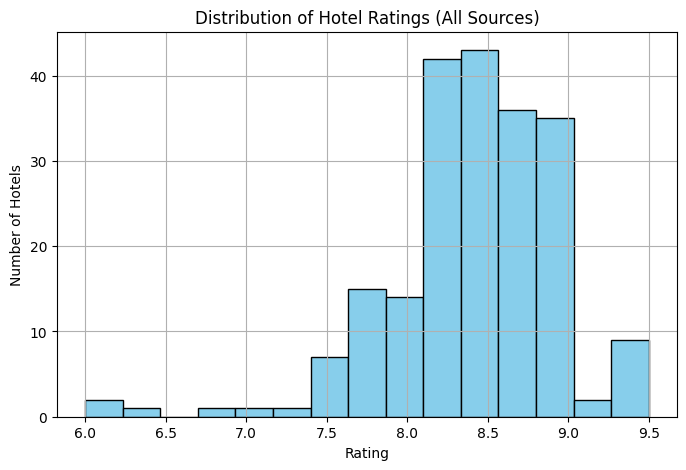

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
combined["rating"].dropna().hist(bins=15, color="skyblue", edgecolor="black")
plt.title("Distribution of Hotel Ratings (All Sources)")
plt.xlabel("Rating")
plt.ylabel("Number of Hotels")
plt.show()

**Analysis:**  
Most hotels are rated between 8.0 and 9.0.  
There are very few hotels below 7.5 or at the extreme high end near 10,  
showing that listed hotels generally maintain good to very good guest ratings.

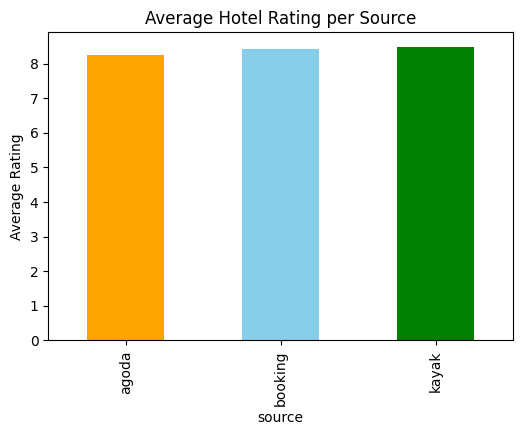

Average ratings per source:
 source
agoda      8.248101
booking    8.433784
kayak      8.487500
Name: rating, dtype: float64


In [ ]:
avg_ratings = combined.groupby("source")["rating"].mean()

plt.figure(figsize=(6,4))
avg_ratings.plot(kind="bar", color=["orange","skyblue","green"])
plt.title("Average Hotel Rating per Source")
plt.ylabel("Average Rating")
plt.show()

print("Average ratings per source:\n", avg_ratings)

**Analysis:**  
Kayak shows the highest average rating (around 8.49),  
while Booking (around 8.43) and Agoda (around 8.25) are slightly lower.  
But rating are pretty close to each other and only slight difference is observed

### Prices
  
We analyze prices in three ways:

1. **Distribution of price per night** – How are hotel prices spread overall?  
2. **Average prices per source** – Do Booking, Kayak, and Agoda differ in typical pricing?  
3. **Relationship between price and stars** – How does price relate to hotel stars and ratings?
4.  **Relationship between price and rating** Do hotels with higher guest ratings tend to have higher prices per night?

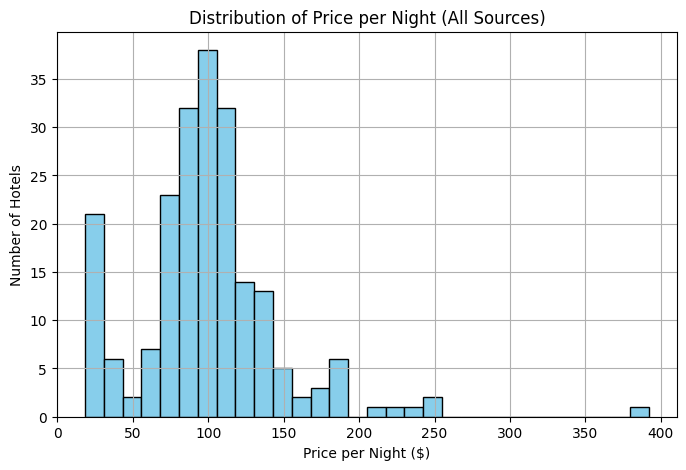

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
combined["price per night ($)"].dropna().hist(
    bins=30,
    color="skyblue",
    edgecolor="black"
)
plt.title("Distribution of Price per Night (All Sources)")
plt.xlabel("Price per Night ($)")
plt.ylabel("Number of Hotels")
plt.show()

**Analysis:**  
Most hotel prices fall below 200 usd per night.  
However, a few extreme outliers above 200 usd drive a long right tail in the distribution.

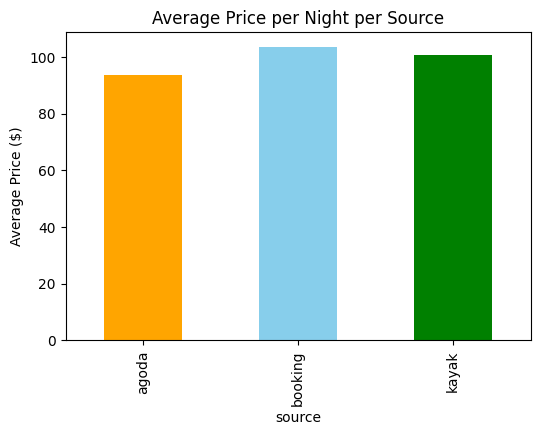

Average price per night per source:
 source
agoda       93.772152
booking    103.617778
kayak      100.719821
Name: price per night ($), dtype: float64


In [ ]:
avg_prices = combined.groupby("source")["price per night ($)"].mean()

plt.figure(figsize=(6,4))
avg_prices.plot(kind="bar", color=["orange","skyblue","green"])
plt.title("Average Price per Night per Source")
plt.ylabel("Average Price ($)")
plt.show()

print("Average price per night per source:\n", avg_prices)

**Analysis:**  
*   Agoda offers the lowest average price per night at **$93.77**.

*   Booking is the most expensive, averaging **$103.62** per night.

*   Kayak is in the middle at **$100.72** per night.

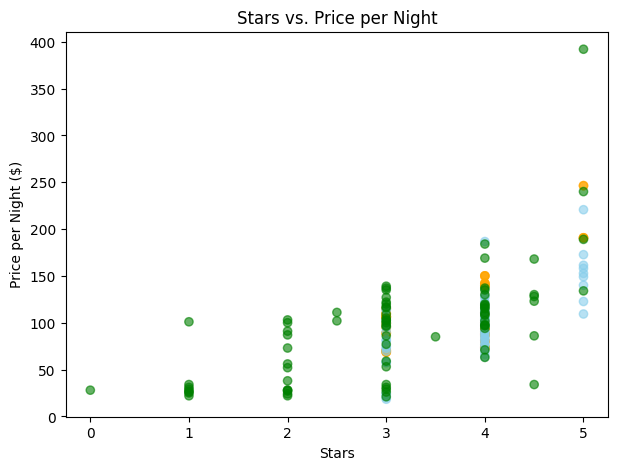

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    combined["stars"], combined["price per night ($)"],
    alpha=0.6, c=combined["source"].map({"booking":"orange","kayak":"skyblue","agoda":"green"})
)
plt.title("Stars vs. Price per Night")
plt.xlabel("Stars")
plt.ylabel("Price per Night ($)")
plt.show()

**Analysis:**  
Prices generally go up as hotel stars increase, though there’s still a lot of variation within each star rating.

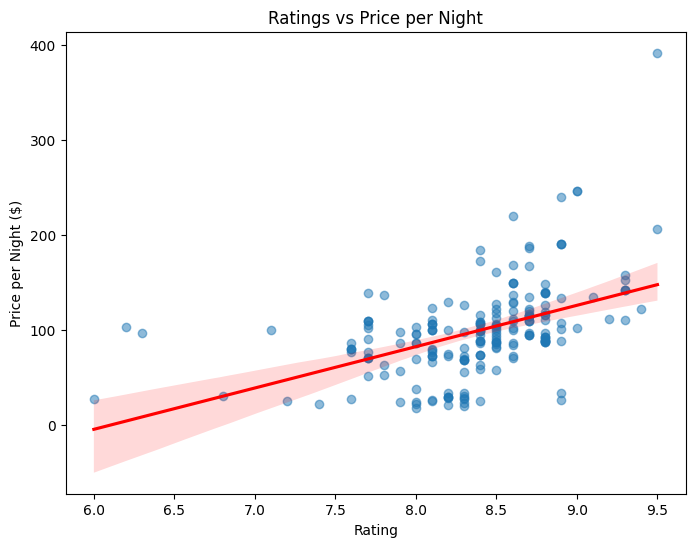

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(
    data=combined,
    x="rating",
    y="price per night ($)",
    scatter_kws={"alpha":0.5},
    line_kws={"color":"red"}
)
plt.title("Ratings vs Price per Night")
plt.xlabel("Rating")
plt.ylabel("Price per Night ($)")
plt.show()

**Analysis:**  
There is a positive trend between ratings and price, although it might not seem that strong.  
Most hotels with good ratings (8–9) still span a wide price range.

### Distance to City Centre (Kayak only)

Here we will try to see:

1) **How far are hotels from the city centre?**  
   Distribution of distances in miles.

2) **Does being closer cost more?**  
   Relationship between distance and **price per night**.

3) **Do closer hotels have better ratings?**  
   Relationship between distance and **guest rating**.

We use Kayak and agoda rows because Booking does not include distance data.

In [ ]:
#slice the column of distance from center whose source is Kayak
kay_agoda = combined.loc[combined["source"].isin(["kayak", "agoda"])].copy()
dist_col = "distance to city centre (mi)"

kay_agoda[["distance to city centre (mi)", "source"]]

,distance to city centre (mi),source
75,2.0,kayak
76,1.1,kayak
77,NaN,kayak
78,1.5,kayak
79,1.6,kayak
...,...,...
206,0.0,agoda
207,0.0,agoda
208,0.0,agoda
209,0.0,agoda


It looks like we have some zero and NaN values on the distance data, and we will drop those and and use the ones that have values

In [ ]:
kay_agoda = kay_agoda.dropna(subset=[dist_col])
kay_agoda = kay_agoda[kay_agoda[dist_col] != 0]

print(kay_agoda.groupby("source")[dist_col].apply(
    lambda x: f"NaN: {x.isna().sum()}, Zero: {(x==0).sum()}"
))
kay_agoda[["distance to city centre (mi)", "source"]]


source
agoda    NaN: 0, Zero: 0
kayak    NaN: 0, Zero: 0
Name: distance to city centre (mi), dtype: object


,distance to city centre (mi),source
75,2.000000,kayak
76,1.100000,kayak
78,1.500000,kayak
79,1.600000,kayak
80,1.300000,kayak
...,...,...
196,0.422533,agoda
197,0.012427,agoda
199,0.001560,agoda
200,0.205053,agoda


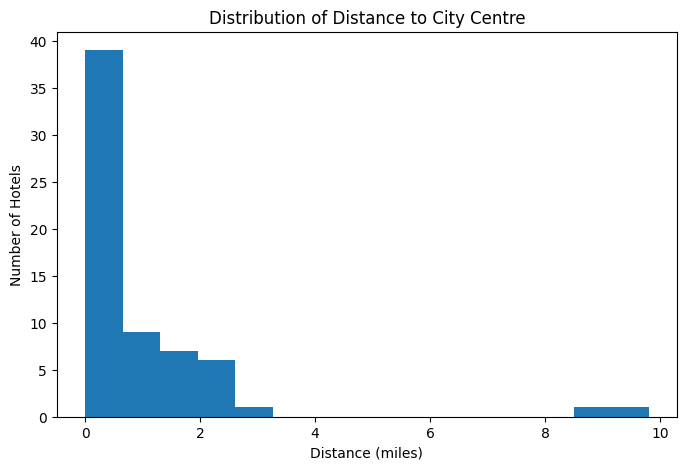

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(kay_agoda[dist_col].dropna(), bins=15)
plt.title("Distribution of Distance to City Centre")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of Hotels")
plt.show()

**Analysis:**  
Most hotels are located within 3 miles of the city centre.  
A small number of hotels are much farther away.

It also seems like we have values of zero but rather we have values that are quiet small ( hotel that are at city center or are very close).

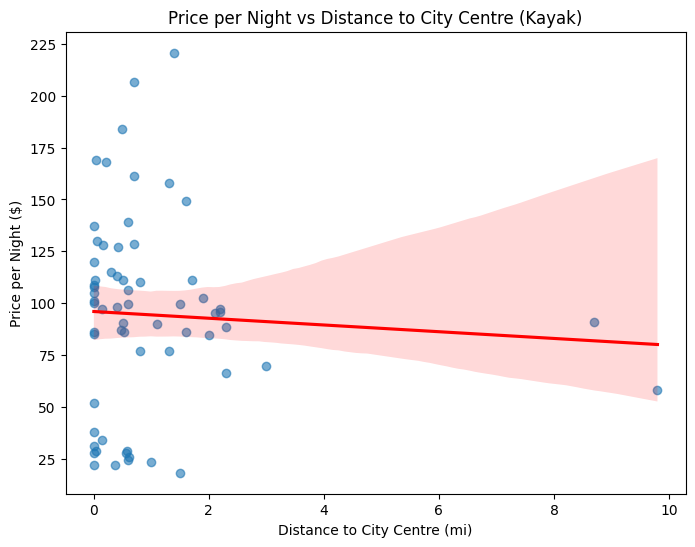

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=kay_agoda,
    x="distance to city centre (mi)",
    y="price per night ($)",
    scatter_kws={"alpha":0.6},
    line_kws={"color":"red"}
)
plt.title("Price per Night vs Distance to City Centre (Kayak)")
plt.xlabel("Distance to City Centre (mi)")
plt.ylabel("Price per Night ($)")
plt.show()

**Analysis:**  
The regression shows a weak negative relationship between price and distance.  
Hotels closer to the city centre tend to cost more,  
but the effect is not strong.  
This could be because most hotels are clustered within just a few miles,  
making it harder to detect a clear trend in the data.

To study whether being closer to the city centre affects guest ratings,  
we divide hotels into **quartiles based on distance** and compare their rating distributions.  
This highlights whether central hotels are consistently rated higher than those further away.

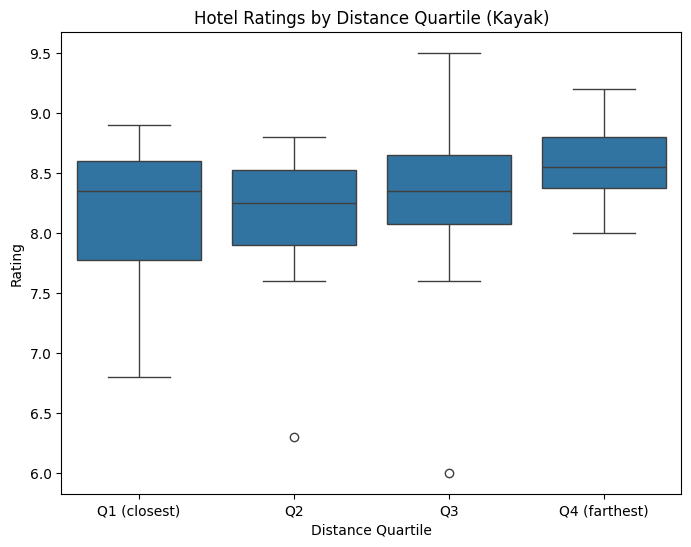

In [ ]:
# Create distance quartiles (skip NaN automatically)
kay_agoda["distance_quartile"] = pd.qcut(
    kay_agoda[dist_col], 4,
    labels=["Q1 (closest)", "Q2", "Q3", "Q4 (farthest)"]
)

# Simple boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=kay_agoda, x="distance_quartile", y="rating")
plt.title("Hotel Ratings by Distance Quartile (Kayak)")
plt.xlabel("Distance Quartile")
plt.ylabel("Rating")
plt.show()

**Analysis:**  
Ratings remain fairly high across all distance quartiles.  
Hotels closest to the city centre do not always score better but it could be because the data collected could be only witihin close proximity of the city center

### Summary Statistics

Finally, we provide a statistical overview of the dataset.  
This helps confirm the overall ranges and central tendencies of the key variables.

We look at two perspectives:

1. **Overall summary** – numeric columns across all hotels (stars, ratings, number of ratings, prices, distance).  
2. **Per-source summary** – average values per booking platform (Booking, Kayak, Agoda).  


In [ ]:
# Global numeric summary
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,202.0,3.487624,0.941627,0.00,3.0,4.000000,4.00,5.0
rating,209.0,8.377990,0.519702,6.00,8.1,8.400000,8.70,9.5
number of ratings,209.0,3615.990431,3158.120036,7.00,1457.0,2786.000000,5173.00,16418.0
total price ($),210.0,297.423810,142.160084,55.00,222.0,292.500000,347.25,1176.0
price per night ($),210.0,99.141159,47.386839,18.33,74.0,97.500000,115.75,392.0
distance to city centre (mi),112.0,0.567088,1.356794,0.00,0.0,0.001118,0.60,9.8


In [ ]:
# Per-source averages (numeric columns only)
per_source_summary = combined.groupby("source").mean(numeric_only=True)

print("Per-source averages:")
display(per_source_summary)

Per-source averages:


,stars,rating,number of ratings,total price ($),price per night ($),distance to city centre (mi)
source,,,,,,
agoda,3.056962,8.248101,3001.810127,281.316456,93.772152,0.068530
booking,3.676471,8.433784,4119.972973,310.853333,103.617778,NaN
kayak,3.872727,8.487500,3816.446429,302.160714,100.719821,1.760606


# User interaction

In [ ]:
# Simple console-driven accommodation finder for the unified 'combined' DataFrame (with emojis)

import pandas as pd
from difflib import get_close_matches
from IPython.display import Image, display
import ast

# --- Setup: work on a copy and index by name for easy lookup ---
df = combined.copy()

# helper: safely parse image_urls column (stringified list or comma-separated)
def parse_image_urls(x):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        return x
    s = str(x).strip()
    if s.startswith('[') and s.endswith(']'):
        try:
            lst = ast.literal_eval(s)
            return [str(u).strip() for u in lst if u]
        except Exception:
            pass
    return [u.strip().strip('"').strip("'") for u in s.split(",") if u.strip()]

# keep a case-insensitive lookup map while preserving original names in index
df["__name_lower__"] = df["name"].str.casefold()
df.set_index("name", inplace=True)

def get_preferences():
    """Prompt for filtering criteria. Blank input skips a filter."""
    print("\n" + "═"*60)
    print("🏨 Accommodation Finder — Filters")
    print("═"*60)
    def _float_or_none(prompt):
        s = input(prompt).strip()
        if not s:
            return None
        try:
            return float(s)
        except:
            print("⚠️ Invalid number; ignoring this filter.")
            return None

    price_min = _float_or_none("💵 Min price per night ($), or blank: ")
    price_max = _float_or_none("💵 Max price per night ($), or blank: ")
    min_stars = _float_or_none("⭐ Min hotel stars (e.g., 3), or blank: ")
    min_rating = _float_or_none("📝 Min review score (e.g., 8.0), or blank: ")
    max_dist  = _float_or_none("📍 Max distance to city centre (mi), or blank: ")

    # sources filter
    all_sources = sorted(df["source"].dropna().unique().tolist())
    print(f"📦 Available sources: {', '.join(all_sources)}")
    s_in = input("✅ Include sources (comma-separated) or blank for all: ").strip()
    if s_in:
        sources = [x.strip().lower() for x in s_in.split(",") if x.strip()]
    else:
        sources = None

    return {
        "price_range": (price_min, price_max),
        "min_stars": min_stars,
        "min_rating": min_rating,
        "max_distance_mi": max_dist,
        "sources": sources
    }

def get_sorting_criteria():
    """Prompt for sort key and order."""
    print("\n--- 🔽 Sorting ---")
    options = [
        ("1", "stars"),
        ("2", "rating"),
        ("3", "price per night ($)"),
        ("4", "number of ratings"),
        ("5", "distance to city centre (mi)"),
        ("6", "total price ($)")
    ]
    for k, col in options:
        print(f"[{k}] {col}")
    choice = input("➡️ Choose (1-6). Default: rating: ").strip()
    sort_by = dict(options).get(choice, "rating")
    asc_in = input("↕️ Ascending? (y/n). Default: descending: ").strip().lower()
    ascending = (asc_in == "y")
    return sort_by, ascending

def filter_and_sort_accommodations(df_indexed, prefs, sort_by, ascending):
    """Apply filters and sort. Returns a view with key columns."""
    out = df_indexed.copy()

    # sources
    if prefs.get("sources"):
        out = out[out["source"].str.lower().isin(prefs["sources"])]

    # price range
    pmin, pmax = prefs["price_range"]
    if pmin is not None:
        out = out[out["price per night ($)"] >= pmin]
    if pmax is not None:
        out = out[out["price per night ($)"] <= pmax]

    # stars and rating
    if prefs.get("min_stars") is not None:
        out = out[out["stars"] >= prefs["min_stars"]]
    if prefs.get("min_rating") is not None:
        out = out[out["rating"] >= prefs["min_rating"]]

    # distance (Kayak only rows have it)
    if prefs.get("max_distance_mi") is not None and "distance to city centre (mi)" in out.columns:
        col = "distance to city centre (mi)"
        out = out[out[col].notna() & (out[col] <= prefs["max_distance_mi"])]

    # sort
    if sort_by in out.columns:
        out = out.sort_values(sort_by, ascending=ascending, na_position="last")

    cols = [
        "source", "address", "stars", "rating", "number of ratings",
        "price per night ($)", "total price ($)", "distance to city centre (mi)"
    ]
    cols = [c for c in cols if c in out.columns]
    return out[cols]

def show_hotel_details(df_indexed, name):
    """Print details for a hotel. Case-insensitive lookup; suggest close matches if not found."""
    # case-insensitive locate
    target = name.casefold()
    # exact case-insensitive match against helper column
    m = df_indexed["__name_lower__"] == target
    if not m.any():
        # substring search
        m = df_indexed.index.to_series().str.contains(name, case=False, na=False)
    if not m.any():
        # suggestions
        names = df_indexed.index.dropna().tolist()
        sug = get_close_matches(name, names, n=5, cutoff=0.6)
        print(f"❌ No hotel found with the name '{name}'.")
        if sug:
            print("💡 Did you mean:")
            for s in sug:
                print(" -", s)
        return

    row = df_indexed[m].iloc[0]

    print("\n" + "─"*60)
    print("📄 Selected Accommodation")
    print("─"*60)
    print(f"🏷️  Name: {row.name}")
    print(f"🌐 Source: {row.get('source')}")
    print(f"📍 Address: {row.get('address')}")
    print(f"⭐ Hotel Stars: {row.get('stars')}")
    print(f"📝 Review Score: {row.get('rating')} (based on {row.get('number of ratings')} reviews)")
    if "price per night ($)" in row and pd.notna(row.get("price per night ($)")):
        print(f"💵 Avg. Price per Night: ${row.get('price per night ($)'):.2f}")
    if "total price ($)" in row and pd.notna(row.get("total price ($)")):
        print(f"💰 Total Price: ${row.get('total price ($)'):.2f}")
    if "distance to city centre (mi)" in row:
        print(f"📏 Distance to City Centre (mi): {row.get('distance to city centre (mi)')}")
    print("\n🧾 Description:")
    print(row.get("description"))

    # photos
    urls = parse_image_urls(row.get("image_urls")) if "image_urls" in df_indexed.columns else []
    if urls:
        print("\n🖼️ Photos:")
        for i, u in enumerate(urls[:3], 1):
            print(f"  • Photo {i}: {u}")
            try:
                display(Image(url=u, width=380))
            except Exception:
                print("    (Could not render image)")

# --- Main loop ---
while True:
    prefs = get_preferences()
    sort_by, ascending = get_sorting_criteria()
    results = filter_and_sort_accommodations(df, prefs, sort_by, ascending)

    if results.empty:
        print("\n😕 No accommodations match your criteria. Try different filters.")
    else:
        print("\n" + "═"*60)
        print(f"🎯 Found {len(results)} accommodations (sorted by '{sort_by}', {'ascending' if ascending else 'descending'}).")
        print("═"*60)
        # show a concise table
        print(results.head(25).to_string())

    # details lookup
    hotel_name_input = input("\n🔎 Enter a hotel name to view details (or 'quit' to exit): ").strip()
    if hotel_name_input.lower() == "quit":
        break
    if hotel_name_input:
        show_hotel_details(df, hotel_name_input)

    cont = input("\n🔁 Run another search? (yes/no): ").strip().lower()
    if cont != "yes":
        break

print("\n✅ Done.")


════════════════════════════════════════════════════════════
🏨 Accommodation Finder — Filters
════════════════════════════════════════════════════════════
💵 Min price per night ($), or blank: 100
💵 Max price per night ($), or blank: 300
⭐ Min hotel stars (e.g., 3), or blank: 3
📝 Min review score (e.g., 8.0), or blank: 7
📍 Max distance to city centre (mi), or blank: 10
📦 Available sources: agoda, booking, kayak
✅ Include sources (comma-separated) or blank for all: agoda,booking

--- 🔽 Sorting ---
[1] stars
[2] rating
[3] price per night ($)
[4] number of ratings
[5] distance to city centre (mi)
[6] total price ($)
➡️ Choose (1-6). Default: rating: 1
↕️ Ascending? (y/n). Default: descending: y

════════════════════════════════════════════════════════════
🎯 Found 34 accommodations (sorted by 'stars', ascending).
════════════════════════════════════════════════════════════
                                                    source                                                           

  • Photo 2: https://q-xx.bstatic.com/xdata/images/hotel/max1024x768/199195004.jpg?k=980ae2ca1e54c0db5bce1cfac9f45e320ec3d18e0d2fbe9a2aa394379f3d8dca&o=


  • Photo 3: https://pix8.agoda.net/hotelImages/115501/-1/dc697c21750f35449b0b12e9ca706bb5.jpg?ca=7&ce=1&s=1024x768



🔁 Run another search? (yes/no): no

✅ Done.
